# Assignment: Designing Secure Architectures to Mitigate Historical Breaches

## Objective
In this assignment, you will analyze three major cybersecurity breaches—Equifax Data Breach (2017), SolarWinds Backdoor Attack (2020), and Capital One Data Breach (2019)—and design secure architectures to address their specific vulnerabilities. For each breach, you will:
1. Create an architecture diagram using Python's `diagrams` module for a system in an environment of your choice (On-premises, AWS, or Azure).
2. Develop three security architectures: **Defense in Depth (DiD)**, **Zero Trust**, and **Adaptive Security**, adapting your initial diagram for each.
3. Explain your design decisions in a table format for each architecture.
4. Submit your work in this notebook, including code, diagrams, and explanations.

## Tools
- **Python Diagramming Library**: Use the `diagrams` module (`pip install diagrams`) to programmatically create architecture diagrams.
- **Environment**: Choose one of the following for your designs: On-premises, AWS, or Azure.
- **Submission**: This notebook with all code, generated diagrams (e.g., PNG files), and tables.

## Instructions
- **Diagrams**: Create a base architecture diagram for each breach, then adapt it for DiD, Zero Trust, and Adaptive Security.
- **Documentation**: Use markdown cells to describe your designs and tables to explain controls.

## Breach Scenarios
### 1. Equifax Data Breach (2017)
- **Web Server / Application Layer** 

    The entry point of the attack was the ACIS web application, which was built using Apache Struts 2, a Java-based web application framework. A known vulnerability in the framework’s Jakarta multipart parser (CVE-2017-5638) allowed remote code execution via malicious HTTP headers.
- **SSL Visibility Appliance and Intrusion Detection System (IDS)**

    The ACIS network traffic was supposed to be monitored by an IDS/IPS system. However, its SSL certificates had expired for nine months, disabling decryption and effectively bypassing inspection. As a result, the IDS could not detect the exfiltration of data.
- **Flat Network Architecture**

    Equifax’s network lacked proper segmentation, which enabled attackers to move laterally from the compromised ACIS to other systems.
- **Backend Databases**
    
    Once inside, the attackers accessed unencrypted databases that stored sensitive personally identifiable information (PII), including Social Security numbers, dates of birth, and driver’s license numbers. ACIS had excessive privileges, giving it unnecessary access to multiple unrelated databases.
- **Credential Storage**
    
    Credentials for accessing other systems were stored unencrypted in shared file systems, making them easily retrievable by the attackers once ACIS was breached.
- **Lack of Web Application Firewall (WAF)**
    
    There was no evidence that ACIS was protected by a WAF, which could have blocked the specific malicious payload exploiting the Apache Struts vulnerability.

### 2. SolarWinds Backdoor Attack (2020)
- **Build environment and development pipeline**

    The attackers gained unauthorized access to SolarWinds’ software development environment. Within this environment, they inserted malware known as SUNBURST into a dynamic link library (DLL), specifically into the Orion platform’s BusinessLayerHost module. This malware was compiled, signed, and distributed through the normal software update process, indicating a failure in build-time integrity checks and code-signing safeguards.
- **Orion platform (application server)**

    The Orion platform, widely used for network monitoring and management, served as the delivery mechanism for the malware. Once installed by customers, the infected Orion software established covert channels with command-and-control (C2) servers. Because the platform was widely trusted and operated with administrative privileges in many environments, it became an ideal vector for deep infiltration.
- **Code-signing and update distribution system**
    
    The malicious update was digitally signed using SolarWinds’ valid certificate and distributed via its official update channel. The lack of tamper detection or policy enforcement in the build pipeline allowed the signed malware to pass undetected through standard validation mechanisms.
- **Command-and-control infrastructure**

    Once deployed, the malware established encrypted communications with remote C2 servers. It gradually exfiltrated system information, including domain names and security tool configurations, and could accept additional commands, including lateral movement and privilege escalation.
- **Customer infrastructure (downstream systems)**

    The affected organizations installed the signed update, thereby unknowingly integrating the backdoor into their internal networks. This included government agencies, defense contractors, tech companies, and universities. In many cases, the Orion platform was deeply embedded in network infrastructure, enabling broad access to sensitive systems.

### 3. Capital One Data Breach (2019)
- **Web application firewall (WAF)**

    The initial vulnerability was a misconfigured reverse proxy implementation of the open-source ModSecurity WAF deployed on an AWS EC2 instance. This misconfiguration enabled a Server-Side Request Forgery (SSRF) attack, which allowed the attacker to send crafted requests to internal AWS resources, particularly the metadata service.
- **AWS metadata service**

    The attacker used the SSRF vulnerability to query the AWS Instance Metadata Service (IMDSv1), which responded with temporary credentials for the IAM role attached to the EC2 instance. The cloud platform trusted these requests without verifying their source.
- **Identity and Access Management (IAM)**

    The IAM role (named ISRM-WAF-Role) was over-permissioned, granting the attacker access to over 700 Amazon S3 buckets. These permissions included the ability to list, read, and likely decrypt data, which violated the principle of least privilege.
- **Amazon S3 storage**

    Sensitive credit card application data was stored in unencrypted or insufficiently protected S3 buckets. Although encryption was used, the IAM role likely included kms:decrypt privileges, allowing the attacker to decrypt the data once the IAM token was obtained.
- **Monitoring and detection systems**

    Intrusion detection and logging systems failed to detect the anomalous activities. The attacker used anonymizing tools like TOR and VPNs to mask her traffic. No alarms were raised over a period of more than four months, during which the attacker exfiltrated nearly 30 GB of data.
- **Cloud governance and shared responsibility model**

    Both Capital One and AWS misunderstood or misapplied the shared responsibility model. While AWS eventually addressed the IMDSv1 vulnerability, at the time of the breach, it had not yet introduced mitigation mechanisms. Capital One relied on AWS best practices but failed to validate and enforce them adequately in its own cloud deployments.

In [163]:
# Add environment-specific imports based on your choice (e.g., from diagrams.aws.network import ELB)

import os
from PIL import Image
from diagrams import Diagram, Cluster, Edge
from diagrams.onprem.client import Users
from diagrams.programming.language import Java, Python
from diagrams.onprem.compute import Server
from diagrams.onprem.database import PostgreSQL
from diagrams.onprem.network import Haproxy, Nginx
from diagrams.onprem.dns import Coredns
from diagrams.onprem.monitoring import Prometheus, Grafana
from diagrams.onprem.security import Vault
from diagrams.onprem.storage import CEPH as EncryptedStorage
from diagrams.onprem.iac import Ansible
from diagrams.aws.compute import EC2
from diagrams.aws.network import ELB
from diagrams.aws.security import WAF, IAM
from diagrams.aws.management import Cloudwatch
from diagrams.aws.storage import S3
from diagrams.generic.network import Firewall, Switch
from diagrams.generic.compute import Rack
from IPython.display import display
from IPython.display import Image, display
from diagrams.aws.network import ELB, Route53, CloudFront
from diagrams.aws.security import KMS, Inspector, Macie, Inspector
from diagrams.aws.management import Cloudwatch, Config
from diagrams.generic.network import Firewall
from diagrams.generic.compute import Rack as Storage
from diagrams.onprem.ci import Jenkins
from diagrams.onprem.vcs import Github
from diagrams.custom import Custom
from diagrams.generic.network import Firewall
from diagrams.onprem.analytics import Metabase
from diagrams.onprem.monitoring import Grafana

# or if not available:
#from diagrams.aws.ml import Comprehend as Inspector



# Equifax Data Breach (2017)
## Base Architecture
**Environment Chosen**: On-premises


### Question 1: Describe the Base Architecture

Briefly describe the system that was compromised in the SolarWinds breach based on the scenario provided. What components (e.g., build servers, update servers) were involved?

**Your Answer**: The Equifax architecture prior to the breach featured a public-facing web portal that included a load balancer (acting as a firewall), DNS services, and an Nginx-based web server delivering access to the ACIS application built on Apache Struts 2. Network traffic flowed through an IDS/IPS system that was deployed but improperly configured, as its SSL certificate had expired, limiting its visibility into encrypted traffic. Internally, the architecture lacked segmentation and followed a flat network model, where the compromised web application had direct, unrestricted access to critical backend systems. These included a PostgreSQL database storing sensitive personally identifiable information (PII) and a shared file system used for storing credentials in plaintext. The ACIS application operated with broad permissions across internal systems, and there was no evidence of strict access controls or encryption at rest. Centralized monitoring was in place via Prometheus, but it was insufficient to detect or respond to anomalous behavior within the environment.


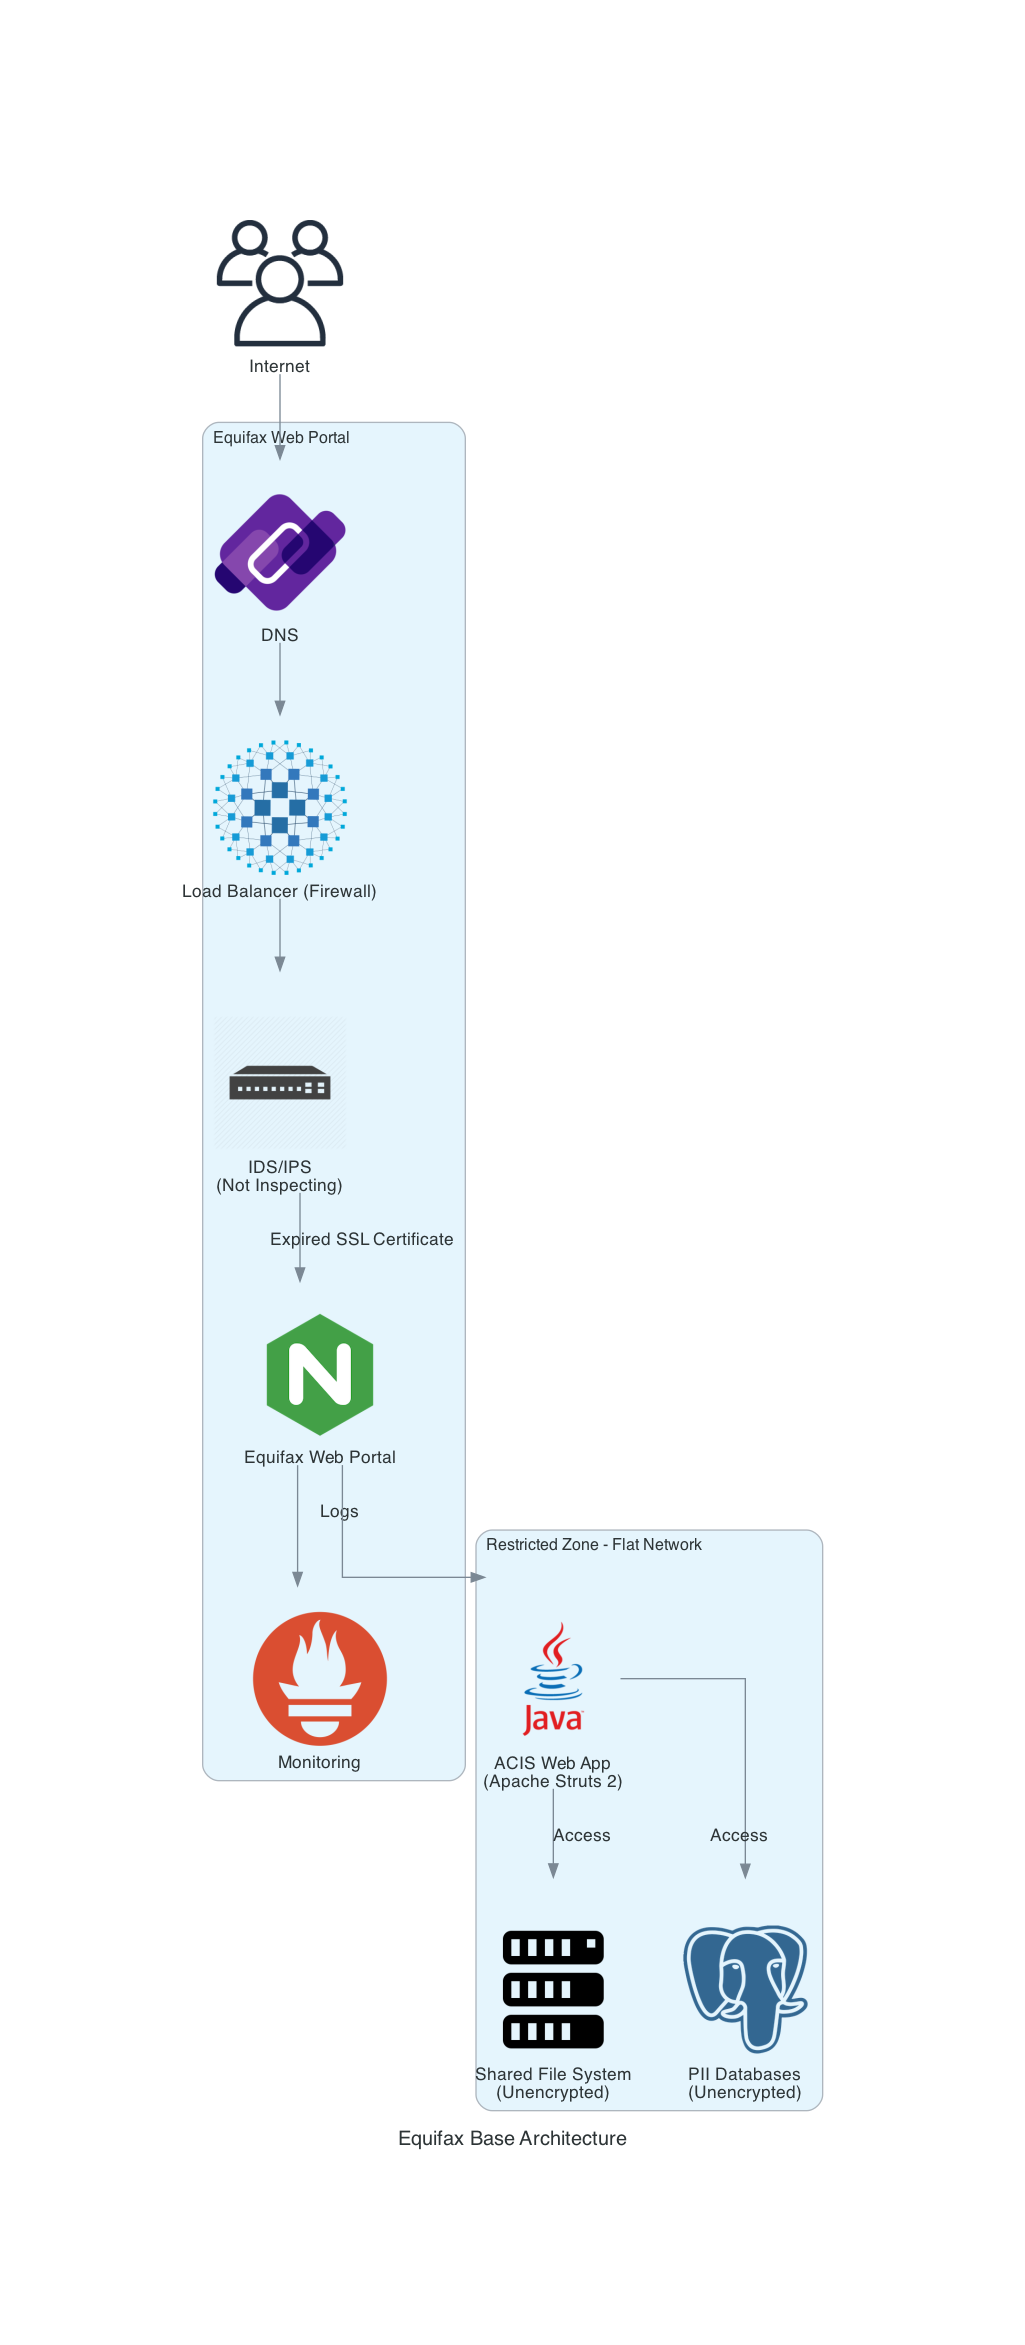

In [164]:
# Create output directory
if not os.path.exists("cyberarch"):
    os.makedirs("cyberarch")

with Diagram("Equifax Base Architecture", show=False, direction="TB", outformat="png", filename="cyberarch/equifax_base_architecture"):

    # External user
    internet = Users("Internet")

    # Equifax Web Zone
    with Cluster("Equifax Web Portal"):
        dns = Coredns("DNS")
        lb = Haproxy("Load Balancer (Firewall)")
        ids = Switch("IDS/IPS\n(Not Inspecting)")
        web_portal = Nginx("Equifax Web Portal")
        monitoring = Prometheus("Monitoring")

        internet >> dns >> lb >> ids >> Edge(label="Expired SSL Certificate" )>> web_portal
        web_portal >> Edge(label="Logs") >> monitoring

    # Restricted Internal Network with flat layout
    with Cluster("Restricted Zone - Flat Network"):
        acis_app = Java("ACIS Web App\n(Apache Struts 2)")
        shared_creds = Server("Shared File System\n(Unencrypted)")
        pii_db = PostgreSQL("PII Databases\n(Unencrypted)")

        web_portal >> acis_app
        acis_app >> Edge(label="Access") >> shared_creds
        acis_app >> Edge(label="Access") >> pii_db

# Display in Jupyter
image_path = "cyberarch/equifax_base_architecture.png"
display(Image(filename=image_path))

## Defense in Depth (DiD) Architecture


### Question 2: Plan Your DiD Controls
How will you apply Defense in Depth to mitigate the Equifax breach issues? List 5 controls in the comments below.


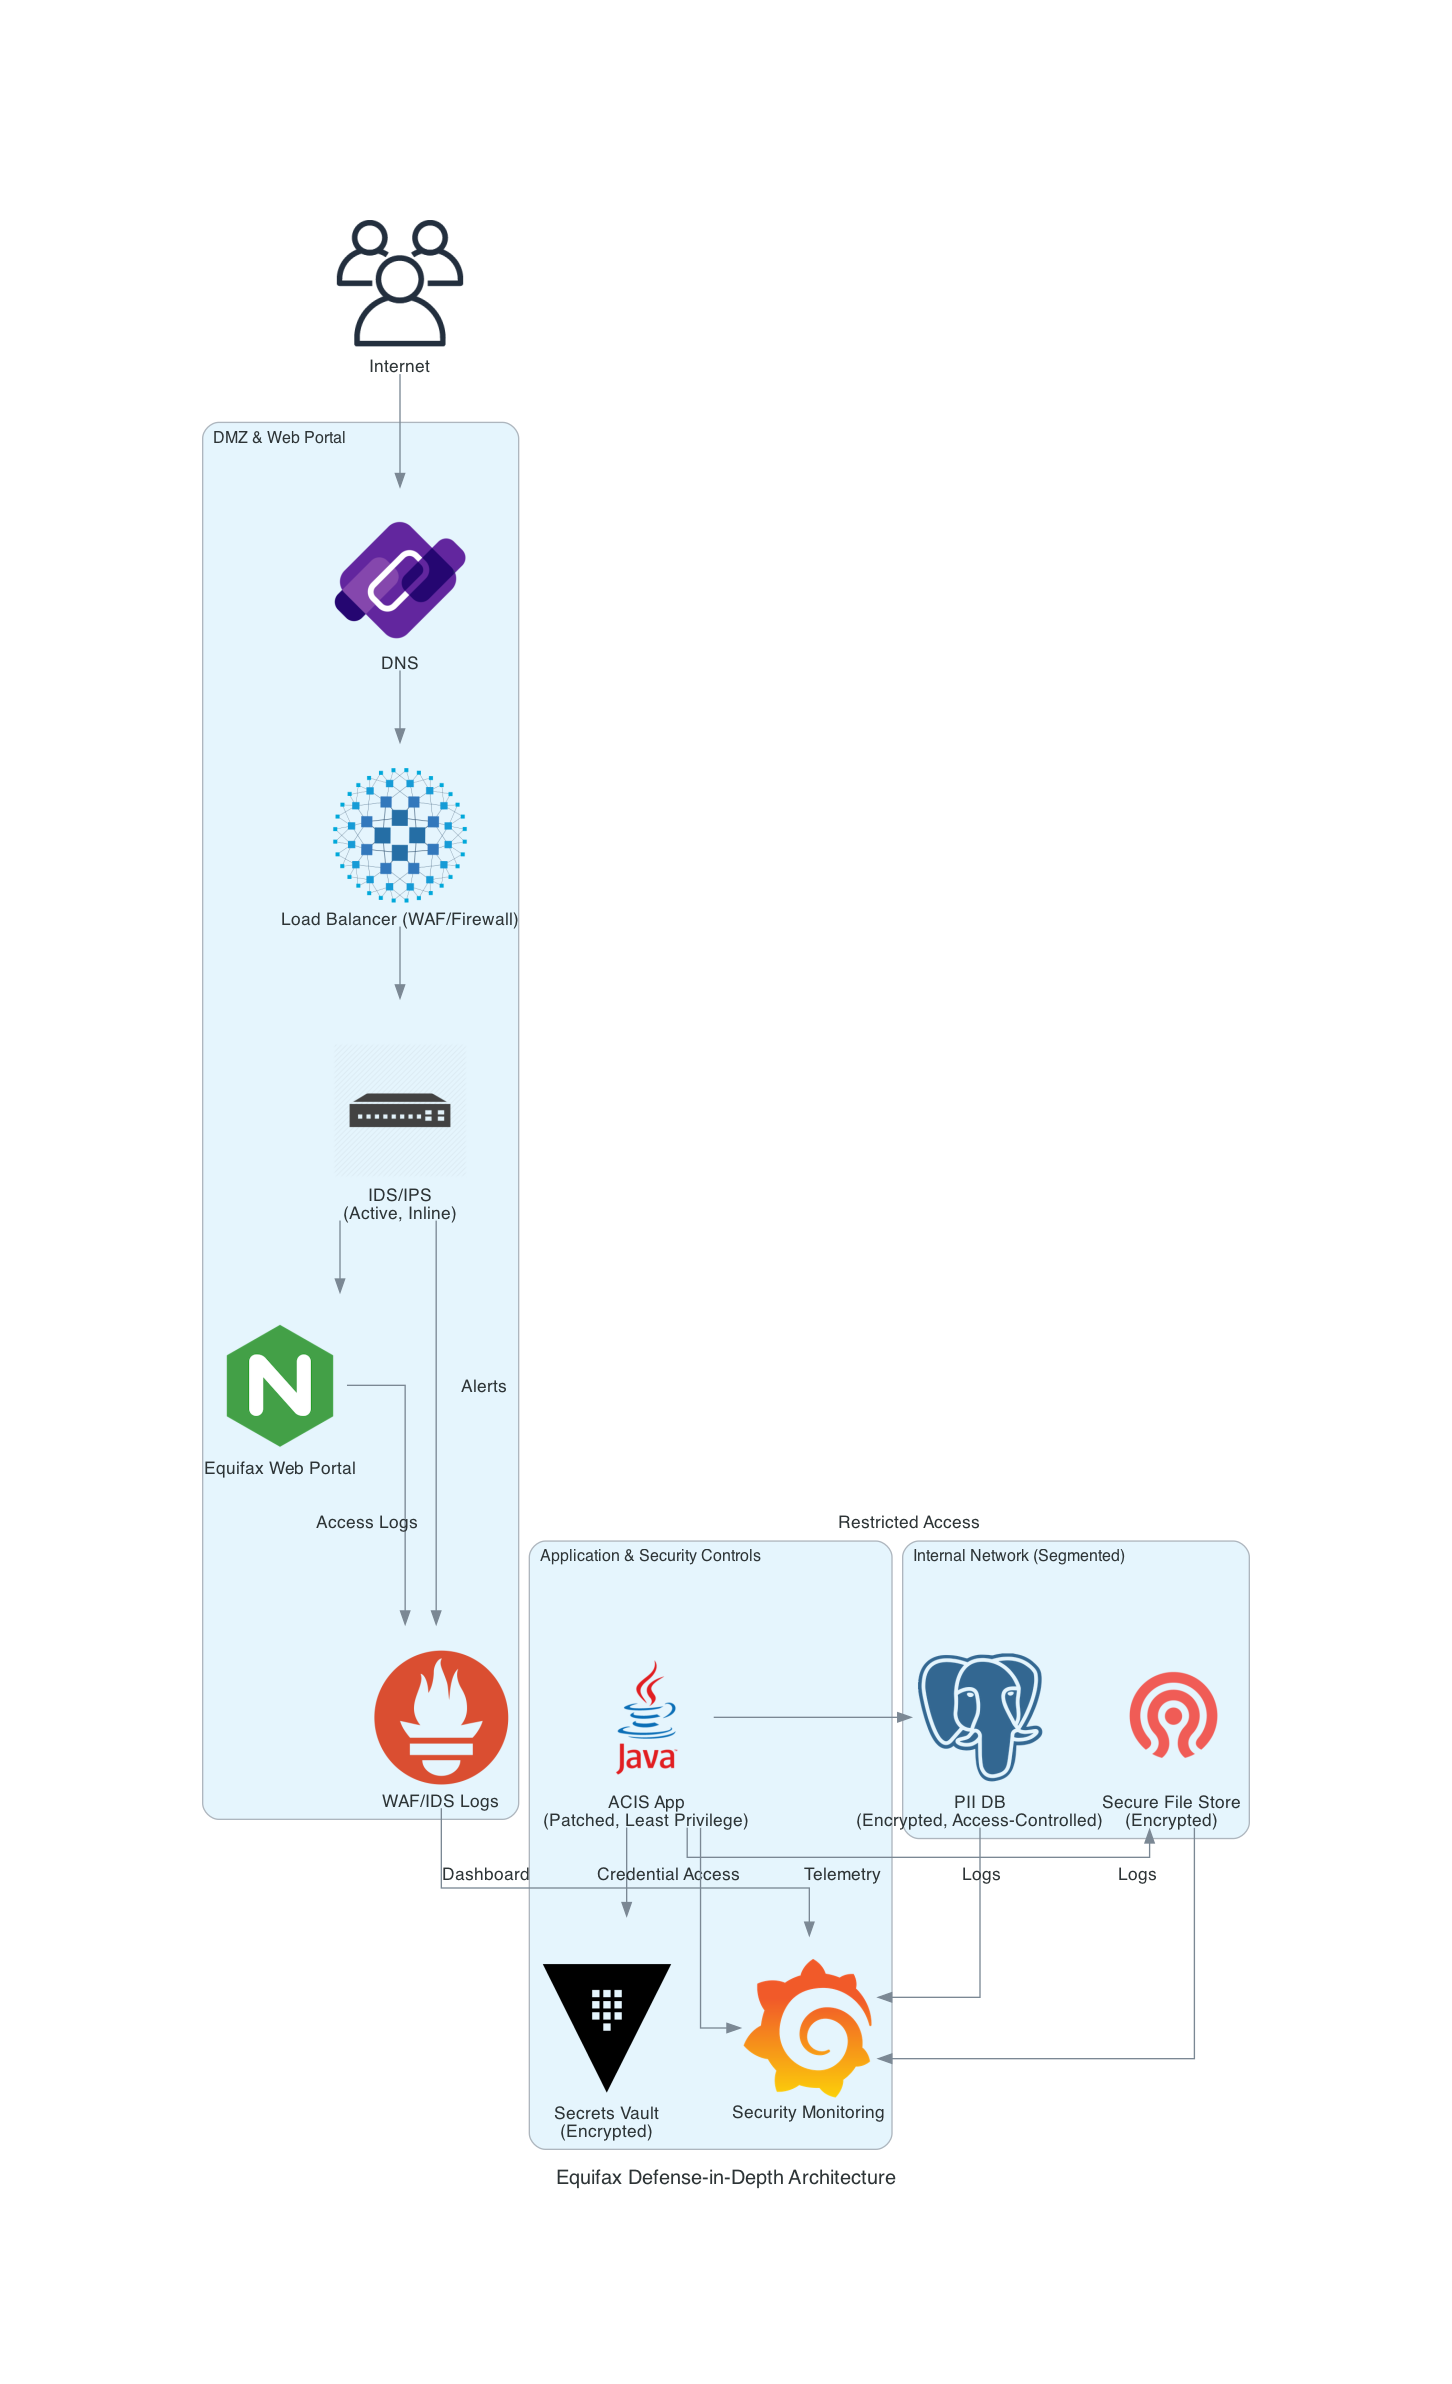

In [165]:
# DiD Controls for Equifax

# Control 1: Patch Management System 
# Applies to: ACIS Web Application (Apache Struts 2) 
# Reason: Mitigates unpatched Struts vulnerability (CVE-2017-5638), which was the entry point of the breach

# Control 2: Web Application Firewall (WAF)
# Applies to: Load Balancer / Web Portal Entry Point 
# Reason: Blocks malicious HTTP requests (e.g., OGNL injection), preventing exploitation of known vulnerabilities

# Control 3: Inline IDS/IPS with Valid SSL Decryption
# Applies to: DMZ Network (between firewall and web servers)
# Reason: Detects and blocks exfiltration and malicious traffic; prevents blind spots due to expired SSL certificates

# Control 4: Principle of Least Privilege (Access Control Policies)
# Applies to: ACIS Application's access to databases and file systems
# Reason: Prevents lateral movement and unauthorized access to unrelated PII and credential stores

# Control 5: Encrypted Storage with Credential Vault
# Applies to: Shared File Systems and Application Secrets
# Reason: Prevents attackers from harvesting plaintext credentials and accessing sensitive data even if they breach the application

# Create output directory
if not os.path.exists("cyberarch"):
    os.makedirs("cyberarch")

# Define the diagram
with Diagram("Equifax Defense-in-Depth Architecture (Subnet Separated)", 
             show=False, direction="TB", outformat="png", 
             filename="cyberarch/equifax_did_architecture_subnet_separated"):

    # External user
    internet = Users("Internet")

    # DMZ & Web Portal with TLS, MFA, hardened web host
    with Cluster("DMZ & Web Portal"):
        dns = Coredns("DNS")
        lb = Haproxy("Load Balancer\n(WAF/Firewall)")
        ids = Switch("IDS/IPS\n(SSL Visibility Enabled)")
        mfa = Server("MFA Gateway\n(Multi-Factor Auth)")
        web_portal = Nginx("Equifax Web Portal\n(Hardened Host + TLS)")
        waf_logs = Prometheus("Edge Logs\n(WAF/IDS)")

        internet >> dns >> lb >> ids >> mfa >> Edge(label="TLS") >> web_portal
        web_portal >> Edge(label="Logs") >> waf_logs
        ids >> Edge(label="Alerts") >> waf_logs

    # Application and Security Controls
    with Cluster("Application & Security Controls"):
        acis = Java("ACIS App\n(Patched + Least Privilege)")
        vault = Vault("Secrets Vault\n(Encrypted)")
        monitor = Grafana("Security Monitoring")
        compliance = Ansible("Compliance Monitor\n(Config Baselines)")

        acis >> Edge(label="Access Secrets") >> vault
        acis >> Edge(label="Telemetry") >> monitor
        waf_logs >> Edge(label="Dashboards") >> monitor
        acis >> Edge(label="Status Reports") >> compliance

    # Internal Network with segmented subnets
    with Cluster("Internal Network"):

        with Cluster("Data Subnet"):
            pii_db = PostgreSQL("PII DB\n(Encrypted)")
            acis >> Edge(label="Restricted Access") >> pii_db
            pii_db >> Edge(label="Logs") >> monitor

        with Cluster("Secrets Subnet"):
            file_store = EncryptedStorage("Credential Store\n(Encrypted)")
            acis >> Edge(label="Restricted Access") >> file_store
            file_store >> Edge(label="Logs") >> monitor

# Display the image in Jupyter
image_path = "cyberarch/equifax_did_architecture.png"
display(Image(filename=image_path))


### DiD Controls Table for Equifax Architecture

| **Control**                                       | **Where It Applies**                                   | **Reason (Rationale)**                                                                                   |
|--------------------------------------------------|--------------------------------------------------------|-----------------------------------------------------------------------------------------------------------|
| **Control 1: Patch Management System**           | ACIS Web Application (Apache Struts 2)                 | Mitigates unpatched Struts vulnerability (CVE-2017-5638), which was the entry point of the breach.       |
| **Control 2: Web Application Firewall (WAF)**    | Load Balancer / Web Portal Entry Point                 | Blocks malicious HTTP requests (e.g., OGNL injection), preventing exploitation of known vulnerabilities. |
| **Control 3: IDS/IPS with SSL Decryption**       | DMZ Network (between firewall and web server)          | Detects and blocks exfiltration and malicious traffic; prevents blind spots due to expired SSL certs.    |
| **Control 4: Least Privilege Access Control**    | ACIS App's access to databases and file systems        | Prevents lateral movement and unauthorized access to unrelated PII and credential stores.                 |
| **Control 5: Encrypted Storage & Secrets Vault** | Shared File Systems and Application Secrets            | Prevents attackers from harvesting plaintext credentials and accessing sensitive data if breached.        |

## Zero Trust Architecture


### Question 3: Plan Your Zero Trust Controls
How will you apply Zero Trust to mitigate the Equifax breach issues? List 5 controls in the comments below.


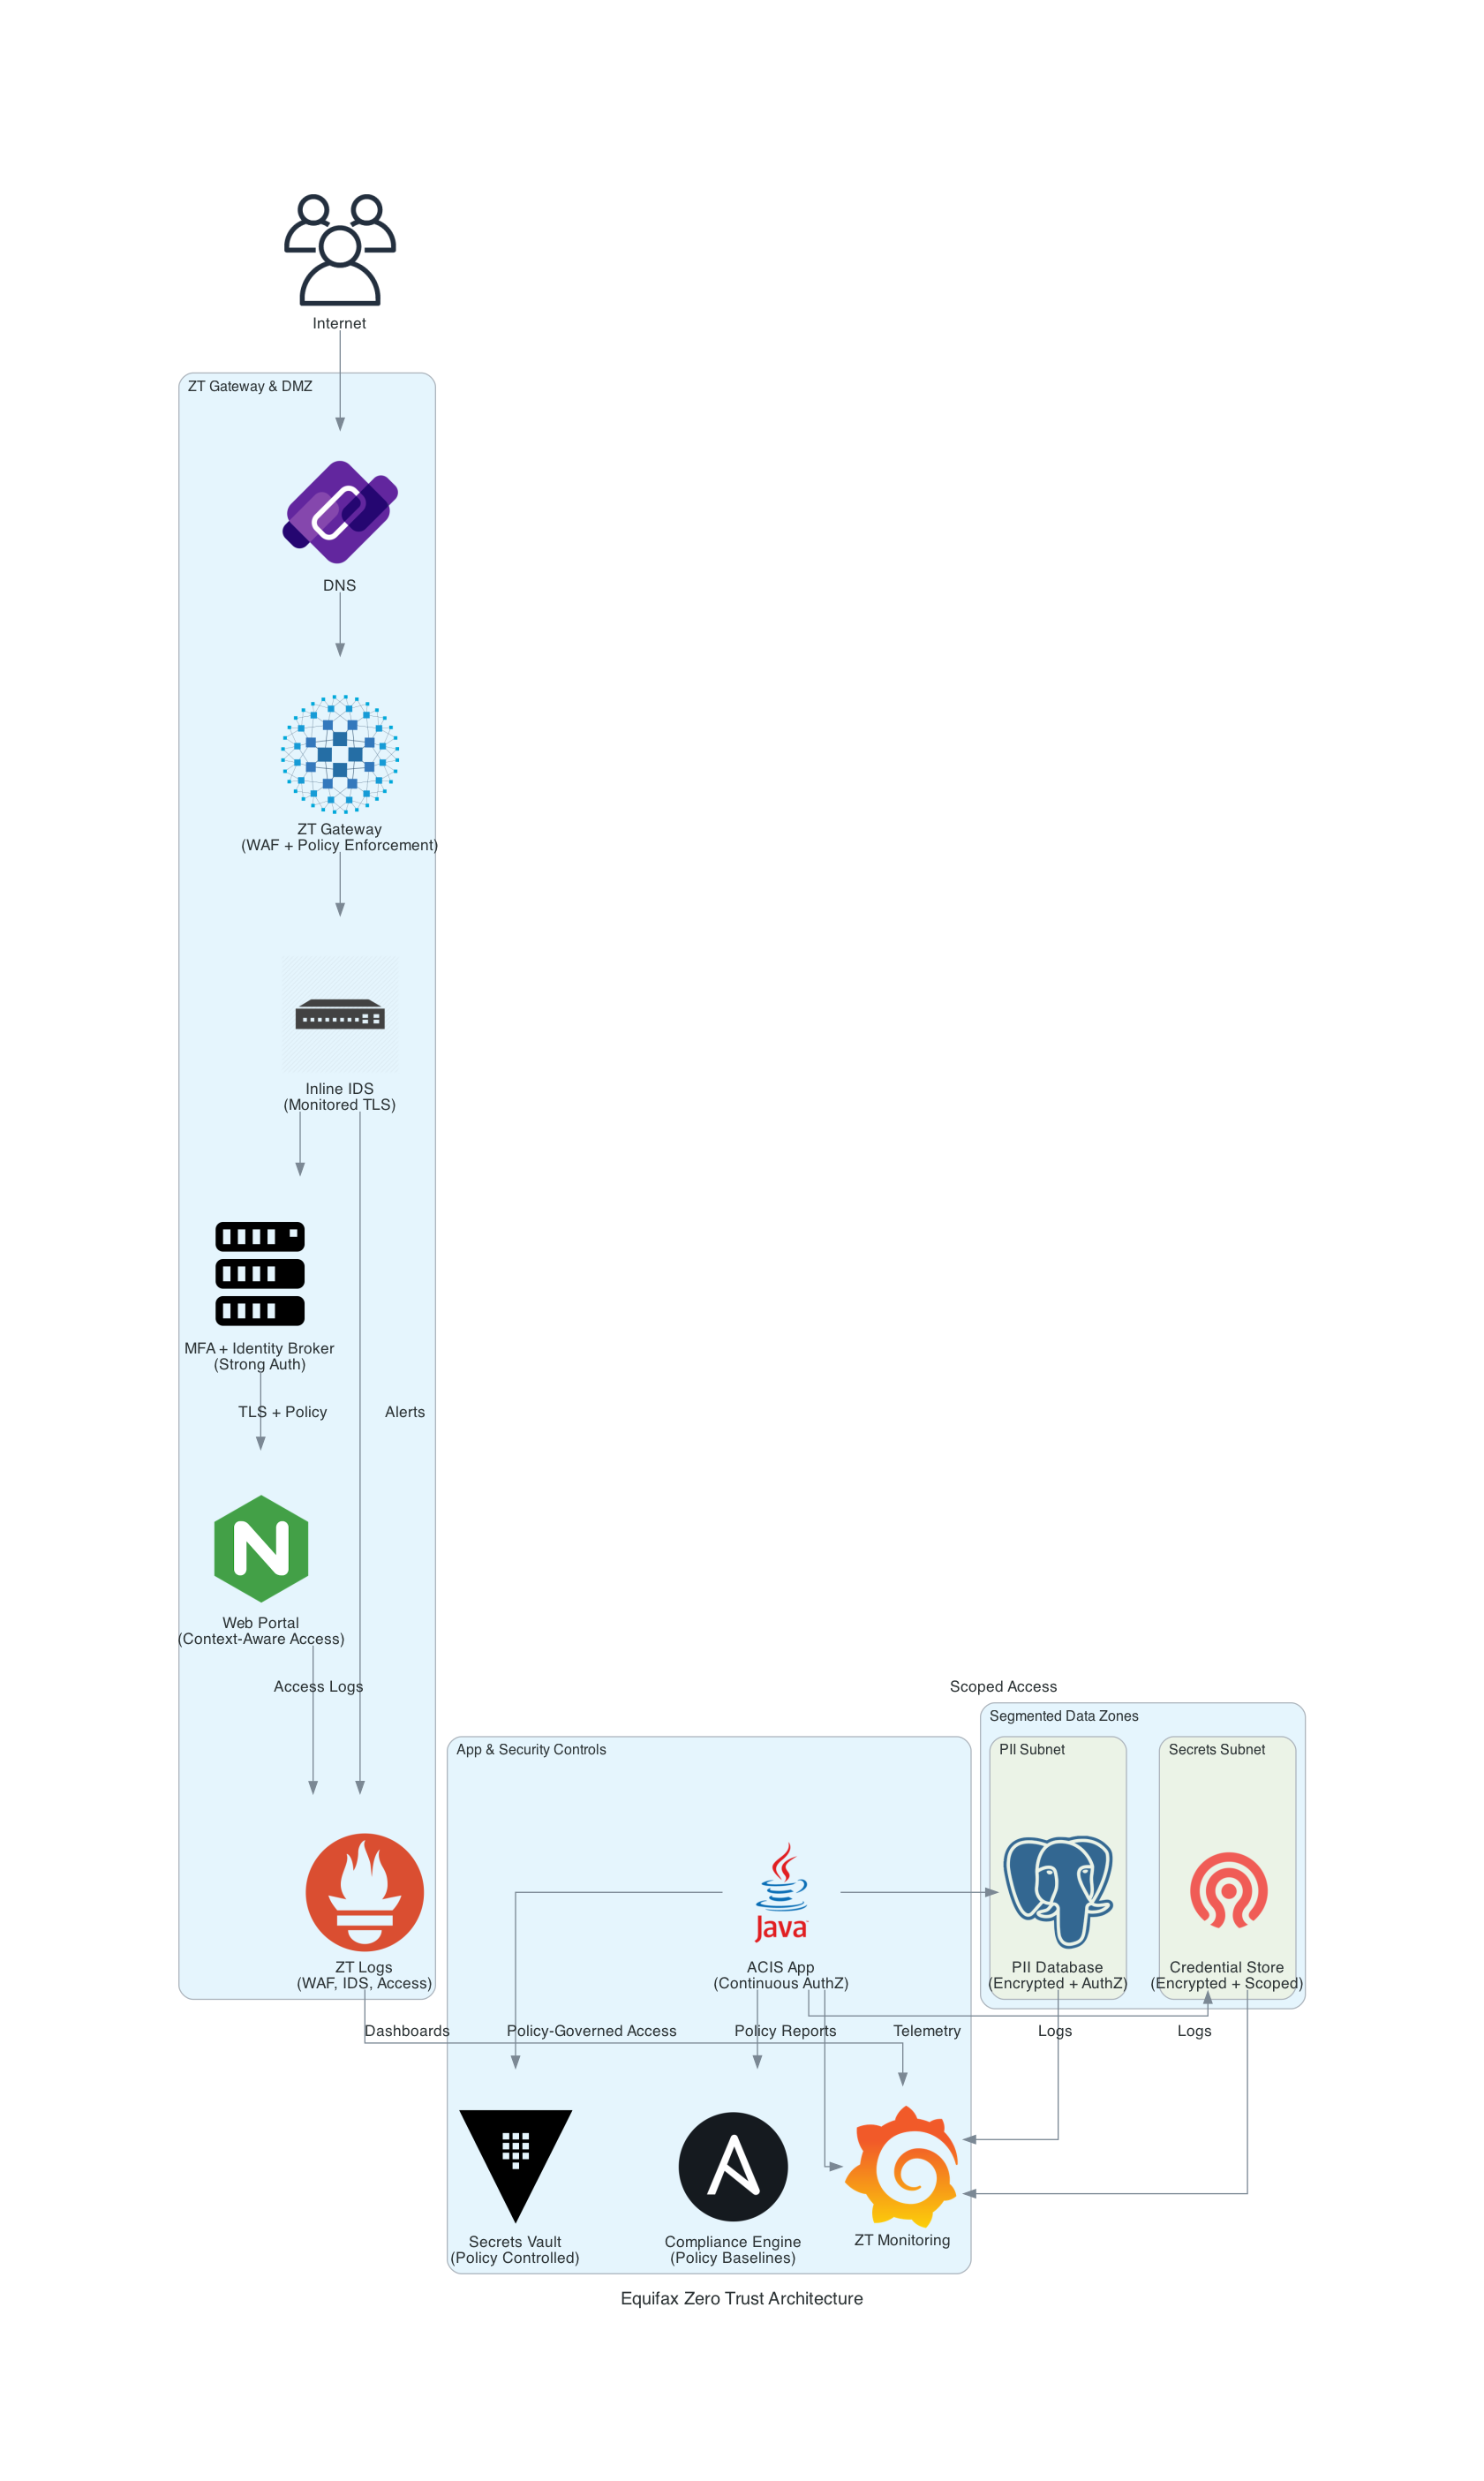

In [166]:
# Zero Trust Controls for Equifax

# Control 1: Multi-Factor Authentication (MFA)
# Applies to: All access points including the web portal and administrative interfaces
# Reason: Enforces strong identity verification before granting any access to internal resources

# Control 2: Continuous Authentication and Authorization
# Applies to: ACIS Web Application and backend access workflows
# Reason: Ensures identity and access context are verified continuously, not just at login

# Control 3: Microsegmentation
# Applies to: Internal network infrastructure
# Reason: Prevents lateral movement within the flat network by isolating sensitive systems and enforcing east-west traffic controls

# Control 4: Data Encryption (In Transit and At Rest)
# Applies to: PII Databases and Credential Store
# Reason: Protects sensitive data from being read or exfiltrated during breach or interception scenarios

# Control 5: Just-in-Time (JIT) and Least Privilege Access
# Applies to: ACIS App access to PII and secrets
# Reason: Restricts access to only what is needed, when it is needed, reducing the attacker’s window of opportunity

# Zero Trust Architecture Diagram for Equifax

if not os.path.exists("cyberarch"):
    os.makedirs("cyberarch")

with Diagram("Equifax Zero Trust Architecture", show=False, direction="TB", outformat="png", filename="cyberarch/equifax_zt"):

    internet = Users("Internet")

    with Cluster("ZT Gateway & DMZ"):
        dns = Coredns("DNS")
        lb = Haproxy("ZT Gateway\n(WAF + Policy Enforcement)")
        ids = Switch("Inline IDS\n(Monitored TLS)")
        mfa = Server("MFA + Identity Broker\n(Strong Auth)")
        web_portal = Nginx("Web Portal\n(Context-Aware Access)")
        waf_logs = Prometheus("ZT Logs\n(WAF, IDS, Access)")

        internet >> dns >> lb >> ids >> mfa >> Edge(label="TLS + Policy") >> web_portal
        web_portal >> Edge(label="Access Logs") >> waf_logs
        ids >> Edge(label="Alerts") >> waf_logs

    with Cluster("App & Security Controls"):
        acis = Java("ACIS App\n(Continuous AuthZ)")
        vault = Vault("Secrets Vault\n(Policy Controlled)")
        monitor = Grafana("ZT Monitoring")
        compliance = Ansible("Compliance Engine\n(Policy Baselines)")

        acis >> Edge(label="Policy-Governed Access") >> vault
        acis >> Edge(label="Telemetry") >> monitor
        waf_logs >> Edge(label="Dashboards") >> monitor
        acis >> Edge(label="Policy Reports") >> compliance

    with Cluster("Segmented Data Zones"):
        with Cluster("PII Subnet"):
            pii_db = PostgreSQL("PII Database\n(Encrypted + AuthZ)")
            acis >> Edge(label="Scoped Access") >> pii_db
            pii_db >> Edge(label="Logs") >> monitor

        with Cluster("Secrets Subnet"):
            cred_store = EncryptedStorage("Credential Store\n(Encrypted + Scoped)")
            acis >> Edge(label="Scoped Access") >> cred_store
            cred_store >> Edge(label="Logs") >> monitor

# Show the image
image_path = "cyberarch/equifax_zt.png"
display(Image(filename=image_path))


### Zero Trust Controls for Equifax

| **Control**                                         | **Where It Applies**                        | **Reason (Rationale)**                                                                 |
|-----------------------------------------------------|---------------------------------------------|------------------------------------------------------------------------------------------|
| **Multi-Factor Authentication (MFA)**               | All access points                           | Ensures strong identity verification at login and resource access                        |
| **Continuous Authentication & Authorization**       | Web Portal, ACIS App                        | Validates session integrity and identity throughout usage                                |
| **Microsegmentation**                               | Internal network                            | Limits lateral movement; enforces strict network zoning                                  |
| **Data Encryption (in transit & at rest)**          | Databases, Credential Stores                | Protects sensitive data from interception or unauthorized exposure                        |
| **Least Privilege + Just-in-Time Access**           | ACIS App, Admin Interfaces, PII DBs         | Restricts access scope and duration, reducing attack surface                             |


### Question 4: Plan Your Adaptive Security Controls
How will you apply Adaptive Security to mitigate the Equifax breach issues? List 5 controls in the comments below.


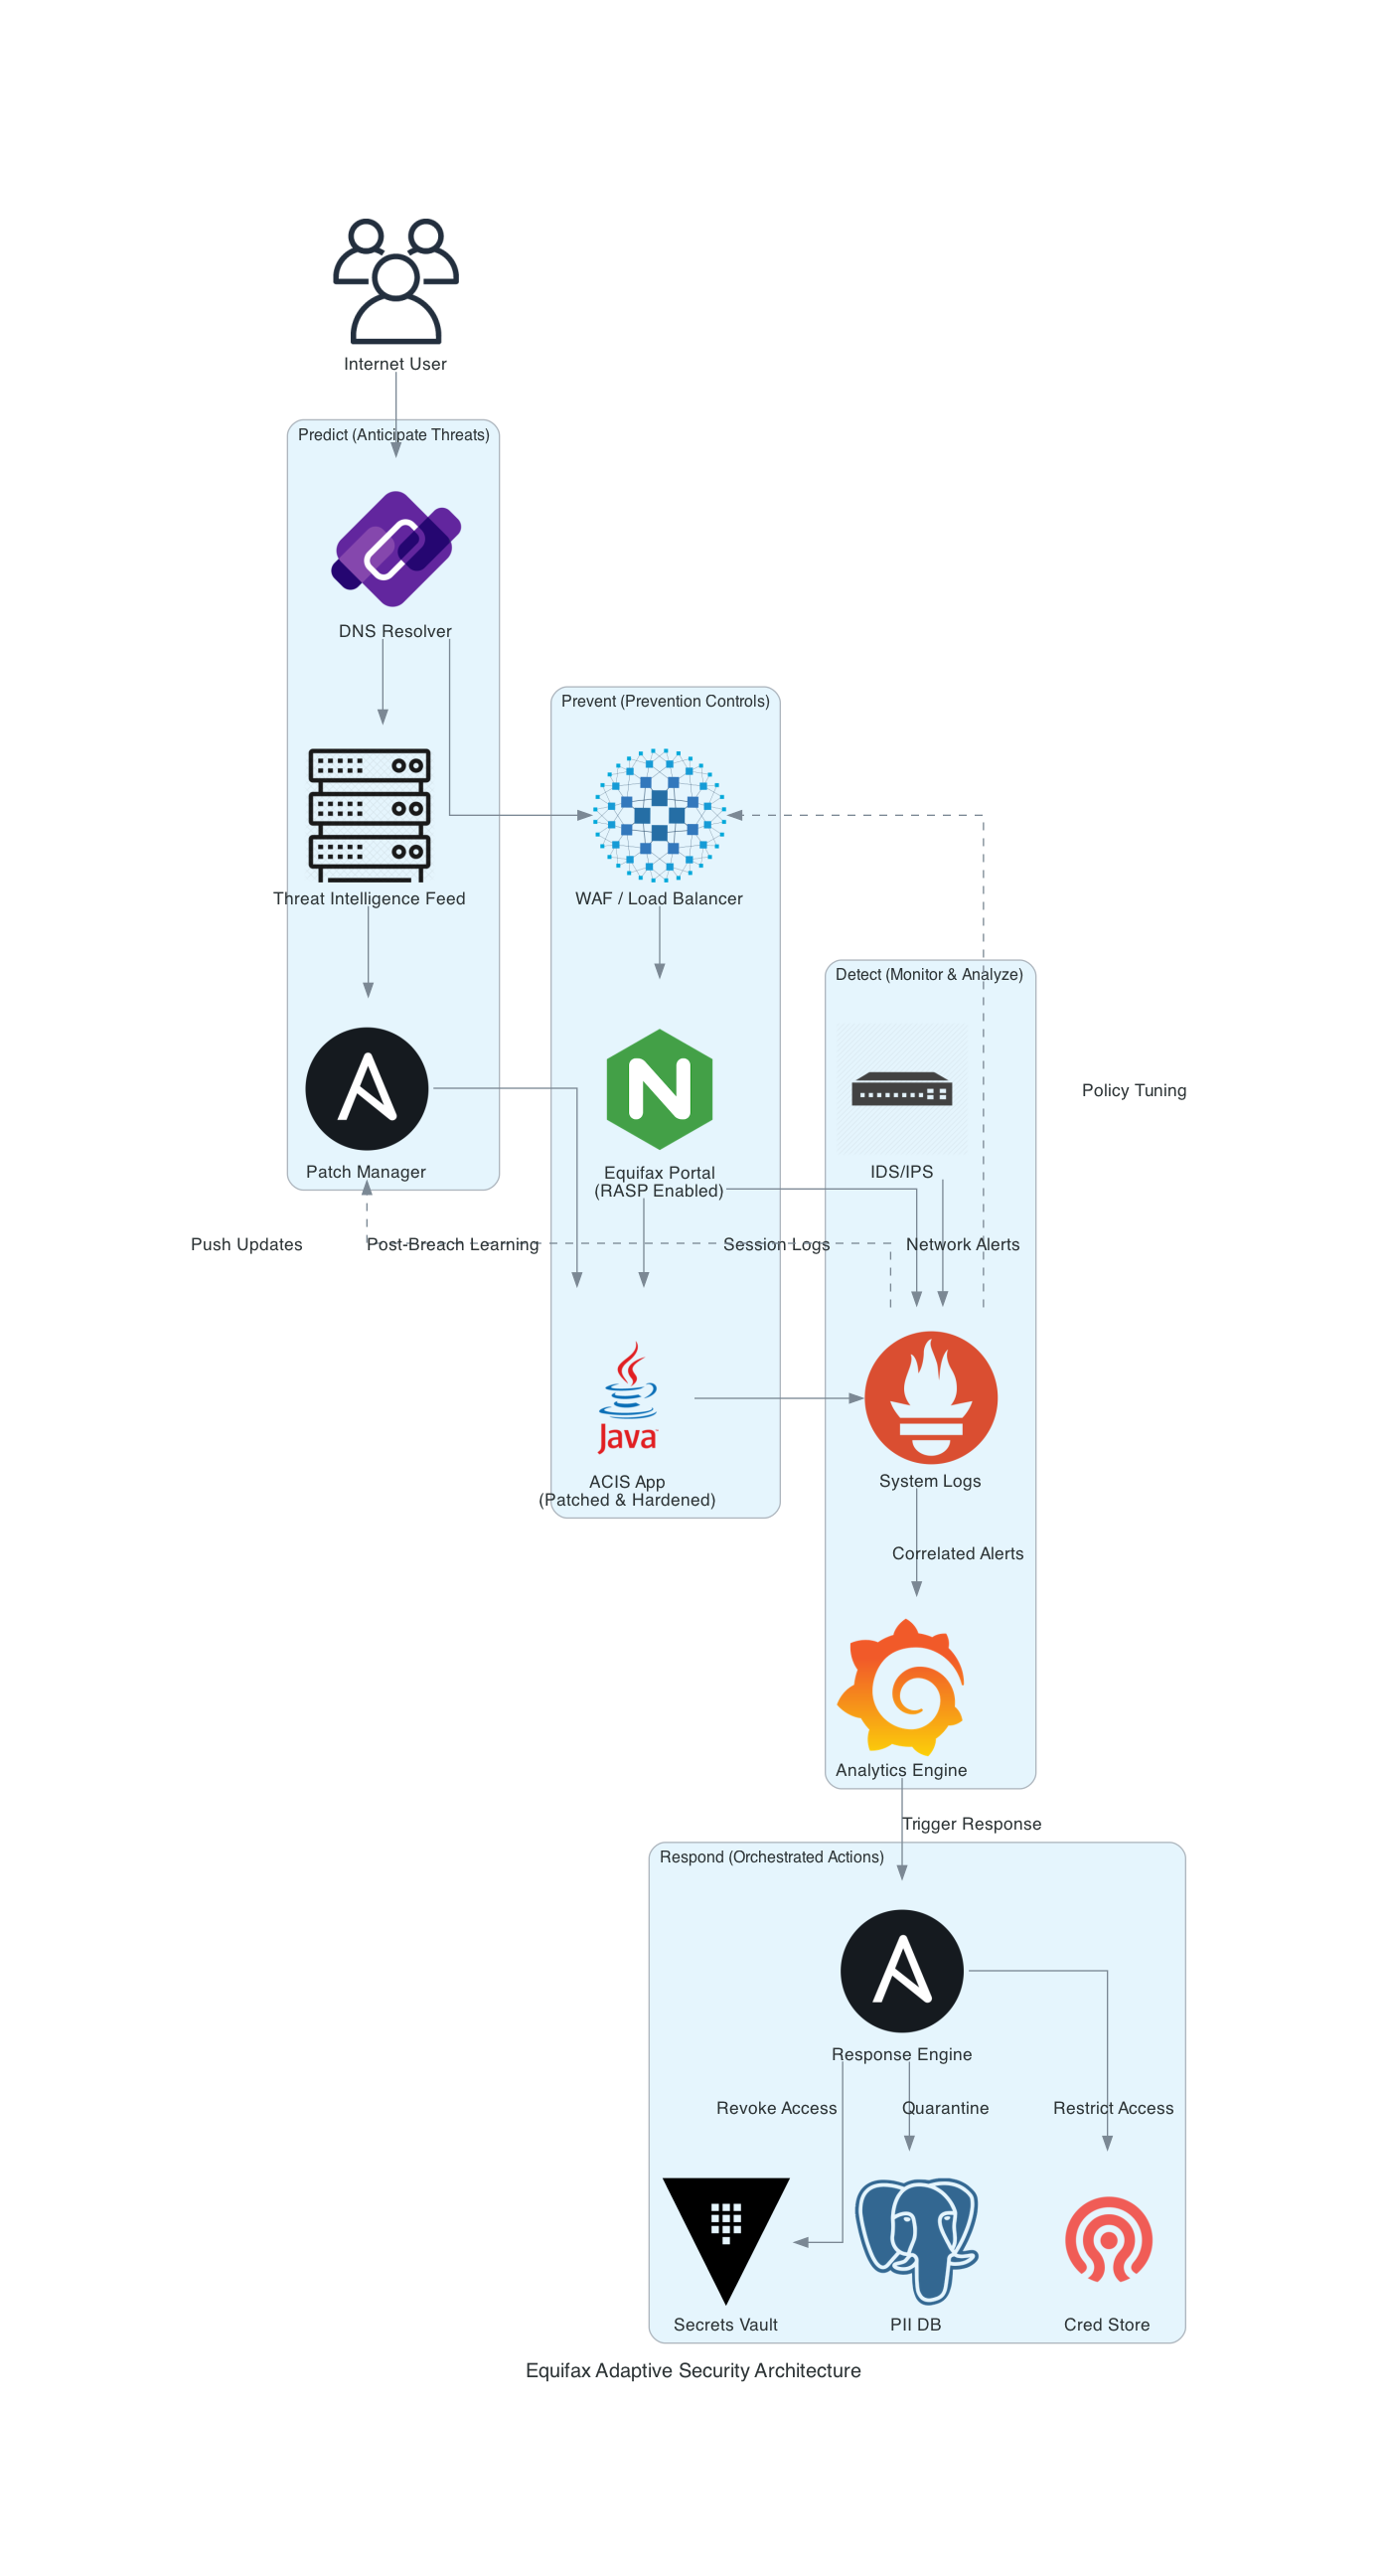

In [167]:
# Adaptive Security Controls for Equifax

# Control 1: Threat Intelligence Integration
# Applies to: Web Gateway, Patch Management Systems
# Reason: Enables predictive identification of vulnerabilities (e.g., CVE-2017-5638) before exploitation

# Control 2: Runtime Application Self-Protection (RASP) / WAF
# Applies to: ACIS Web Application
# Reason: Provides in-line prevention of known exploit patterns (e.g., OGNL injection in Apache Struts)

# Control 3: Continuous Behavior Monitoring
# Applies to: All endpoints and network zones
# Reason: Detects anomalies such as unusual access patterns or lateral movement post-compromise

# Control 4: Automated Incident Response Engine
# Applies to: SIEM, Vault Access, and Network Policies
# Reason: Orchestrates real-time response (e.g., disable credentials, quarantine host) upon detection

# Control 5: Post-Incident Feedback Loop
# Applies to: Configuration Management and Policy Updates
# Reason: Ensures lessons learned (e.g., from expired SSL certs or excessive privileges) trigger future policy improvements

# Create output directory
if not os.path.exists("cyberarch"):
    os.makedirs("cyberarch")

# Define the diagram
with Diagram("Equifax Adaptive Security Architecture", show=False, direction="TB", outformat="png", filename="cyberarch/equifax_asa"):

    # External Entry
    user = Users("Internet User")

    # Predict
    with Cluster("Predict (Anticipate Threats)"):
        dns = Coredns("DNS Resolver")
        threat_intel = Rack("Threat Intelligence Feed")
        patch_mgmt = Ansible("Patch Manager")
        dns >> threat_intel >> patch_mgmt

    # Prevent
    with Cluster("Prevent (Prevention Controls)"):
        lb = Haproxy("WAF / Load Balancer")
        web = Nginx("Equifax Portal\n(RASP Enabled)")
        app = Java("ACIS App\n(Patched & Hardened)")

        patch_mgmt >> Edge(label="Push Updates") >> app
        user >> dns >> lb >> web >> app

    # Detect
    with Cluster("Detect (Monitor & Analyze)"):
        ids = Switch("IDS/IPS")
        monitoring = Prometheus("System Logs")
        siem = Grafana("Analytics Engine")

        app >> Edge(label="Behavior Logs") >> monitoring
        web >> Edge(label="Session Logs") >> monitoring
        ids >> Edge(label="Network Alerts") >> monitoring
        monitoring >> Edge(label="Correlated Alerts") >> siem

    # Respond
    with Cluster("Respond (Orchestrated Actions)"):
        response = Ansible("Response Engine")
        vault = Vault("Secrets Vault")
        pii = PostgreSQL("PII DB")
        secrets = EncryptedStorage("Cred Store")

        siem >> Edge(label="Trigger Response") >> response
        response >> Edge(label="Revoke Access") >> vault
        response >> Edge(label="Quarantine") >> pii
        response >> Edge(label="Restrict Access") >> secrets

    # Feedback
    monitoring >> Edge(label="Policy Tuning", style="dashed") >> lb
    monitoring >> Edge(label="Post-Breach Learning", style="dashed") >> patch_mgmt

# Display the image
image_path = "cyberarch/equifax_asa.png"
display(Image(filename=image_path))

### Adaptive Security Controls for Equifax

| **Control**                                | **Where It Applies**                          | **Reason (Rationale)**                                                                 |
|--------------------------------------------|------------------------------------------------|------------------------------------------------------------------------------------------|
| **Threat Intelligence Integration**        | DNS, Patch Management Systems                 | Enables proactive detection of known CVEs (e.g., CVE-2017-5638) and early remediation    |
| **Runtime Application Protection (WAF/RASP)** | Web Portal, ACIS App                         | Prevents real-time exploitation using contextual analysis and payload inspection         |
| **Continuous Monitoring & Analytics**      | All network zones, endpoints, applications    | Detects abnormal behavior, lateral movement, and data exfiltration attempts              |
| **Automated Incident Response**            | Secrets Vault, PII DBs, Credential Store      | Orchestrates rapid containment by revoking access, isolating assets, and alerting teams  |
| **Feedback Loop & Policy Hardening**       | Patch Manager, Config Baselines               | Uses insights from detection to continuously improve defenses and reduce response time   |


# SolarWinds Backdoor Attack (2020)
## Base Architecture
**Environment Chosen**: on-premise


### Question 5: Describe the Base Architecture
Briefly describe the system that was compromised in the SolarWinds breach based on the scenario provided. What components (e.g., build servers, update servers) were involved?


**Your Answer**: The SolarWinds breach targeted the company’s on-premises software development infrastructure, where attackers gained access to developer workstations and moved laterally into the build environment. Within this environment, they compromised the internal Git repository and injected the SUNBURST malware into the Orion platform via the CI/CD build server. The compromised build was then signed using SolarWinds’ legitimate code-signing service and distributed through the official update server to downstream customers. Key components involved in this architecture included developer machines, source control systems, build automation (e.g., Jenkins), code-signing infrastructure, the public-facing update distribution channel, and the Orion platform installed within customer environments. The attack succeeded due to a lack of network segmentation, insufficient validation in the build pipeline, and the absence of adaptive monitoring or behavior-based detection.


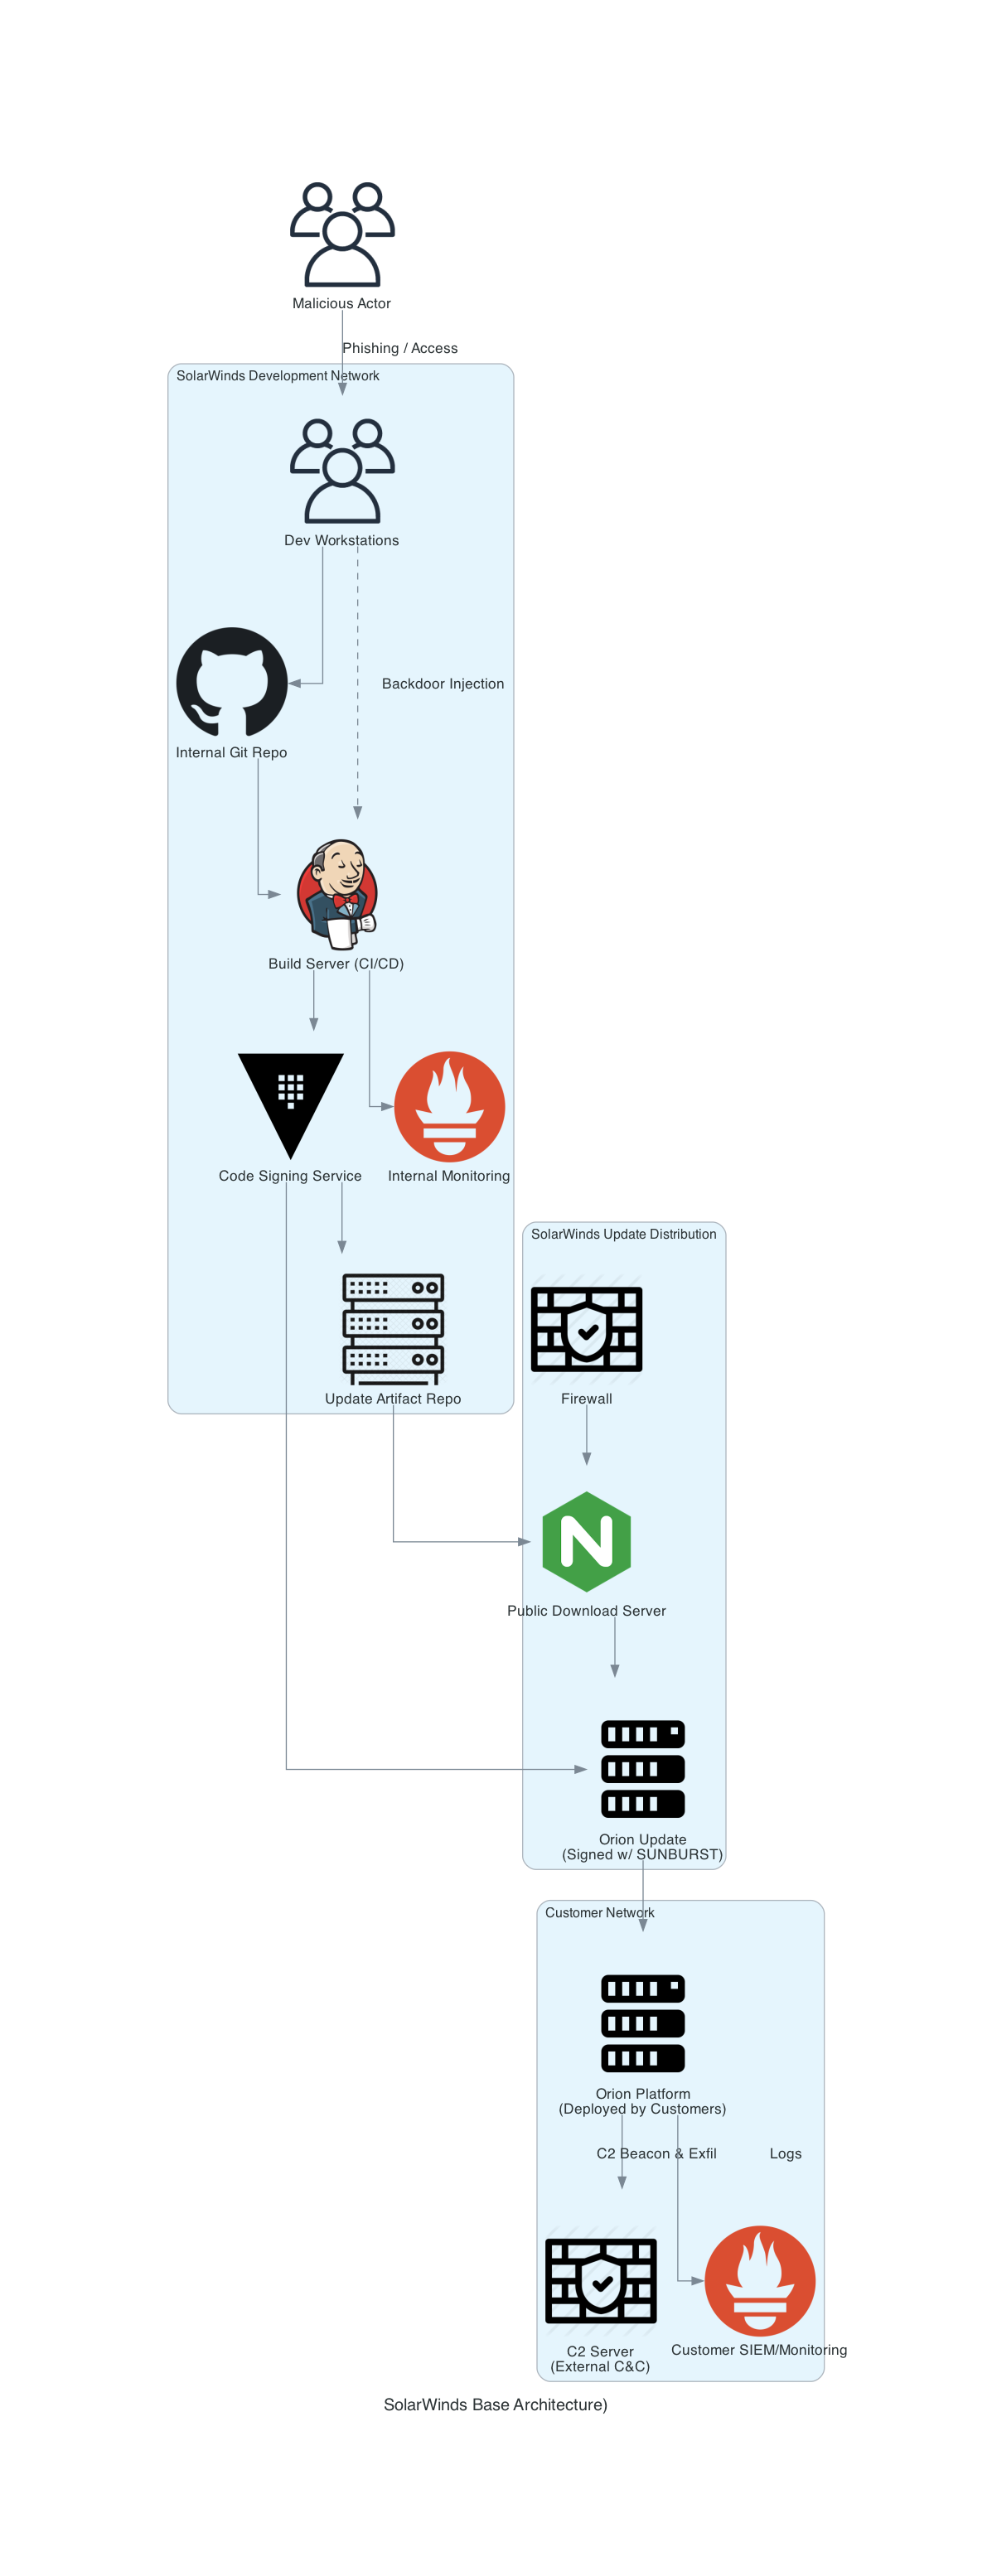

In [168]:
# Create output directory
if not os.path.exists("cyberarch"):
    os.makedirs("cyberarch")

# Define the architecture
with Diagram("SolarWinds Base Architecture)", show=False, direction="TB", outformat="png", filename="cyberarch/solarwinds_base_architecture"):

    # External Attacker
    attacker = Users("Malicious Actor")

    # SolarWinds Development Environment
    with Cluster("SolarWinds Development Network"):
        dev_users = Users("Dev Workstations")
        git_repo = Github("Internal Git Repo")
        jenkins = Jenkins("Build Server (CI/CD)")
        signing = Vault("Code Signing Service")
        artifact_repo = Storage("Update Artifact Repo")
        monitor = Prometheus("Internal Monitoring")

        # Normal flow
        dev_users >> git_repo >> jenkins >> signing >> artifact_repo
        jenkins >> monitor

        # Compromise path
        attacker >> Edge(label="Phishing / Access") >> dev_users
        dev_users >> Edge(style="dashed", label="Backdoor Injection") >> jenkins

    # Software Distribution Channel
    with Cluster("SolarWinds Update Distribution"):
        fw = Firewall("Firewall")
        nginx = Nginx("Public Download Server")
        signed_package = Server("Orion Update\n(Signed w/ SUNBURST)")

        artifact_repo >> nginx
        signing >> signed_package
        fw >> nginx >> signed_package

    # Customer Environment
    with Cluster("Customer Network"):
        orion = Server("Orion Platform\n(Deployed by Customers)")
        c2 = Firewall("C2 Server\n(External C&C)")
        sec_monitor = Prometheus("Customer SIEM/Monitoring")

        signed_package >> orion
        orion >> Edge(label="C2 Beacon & Exfil") >> c2
        orion >> Edge(label="Logs") >> sec_monitor

# Display if running in Jupyter (optional)
from IPython.display import Image, display
image_path = "cyberarch/solarwinds_base_architecture.png"
display(Image(filename=image_path))

## Defense in Depth (DiD) Architecture


### Question 6: Plan Your DiD Controls
How will you apply Defense in Depth to mitigate the SolarWinds breach issues? List 5 controls in the comments below.


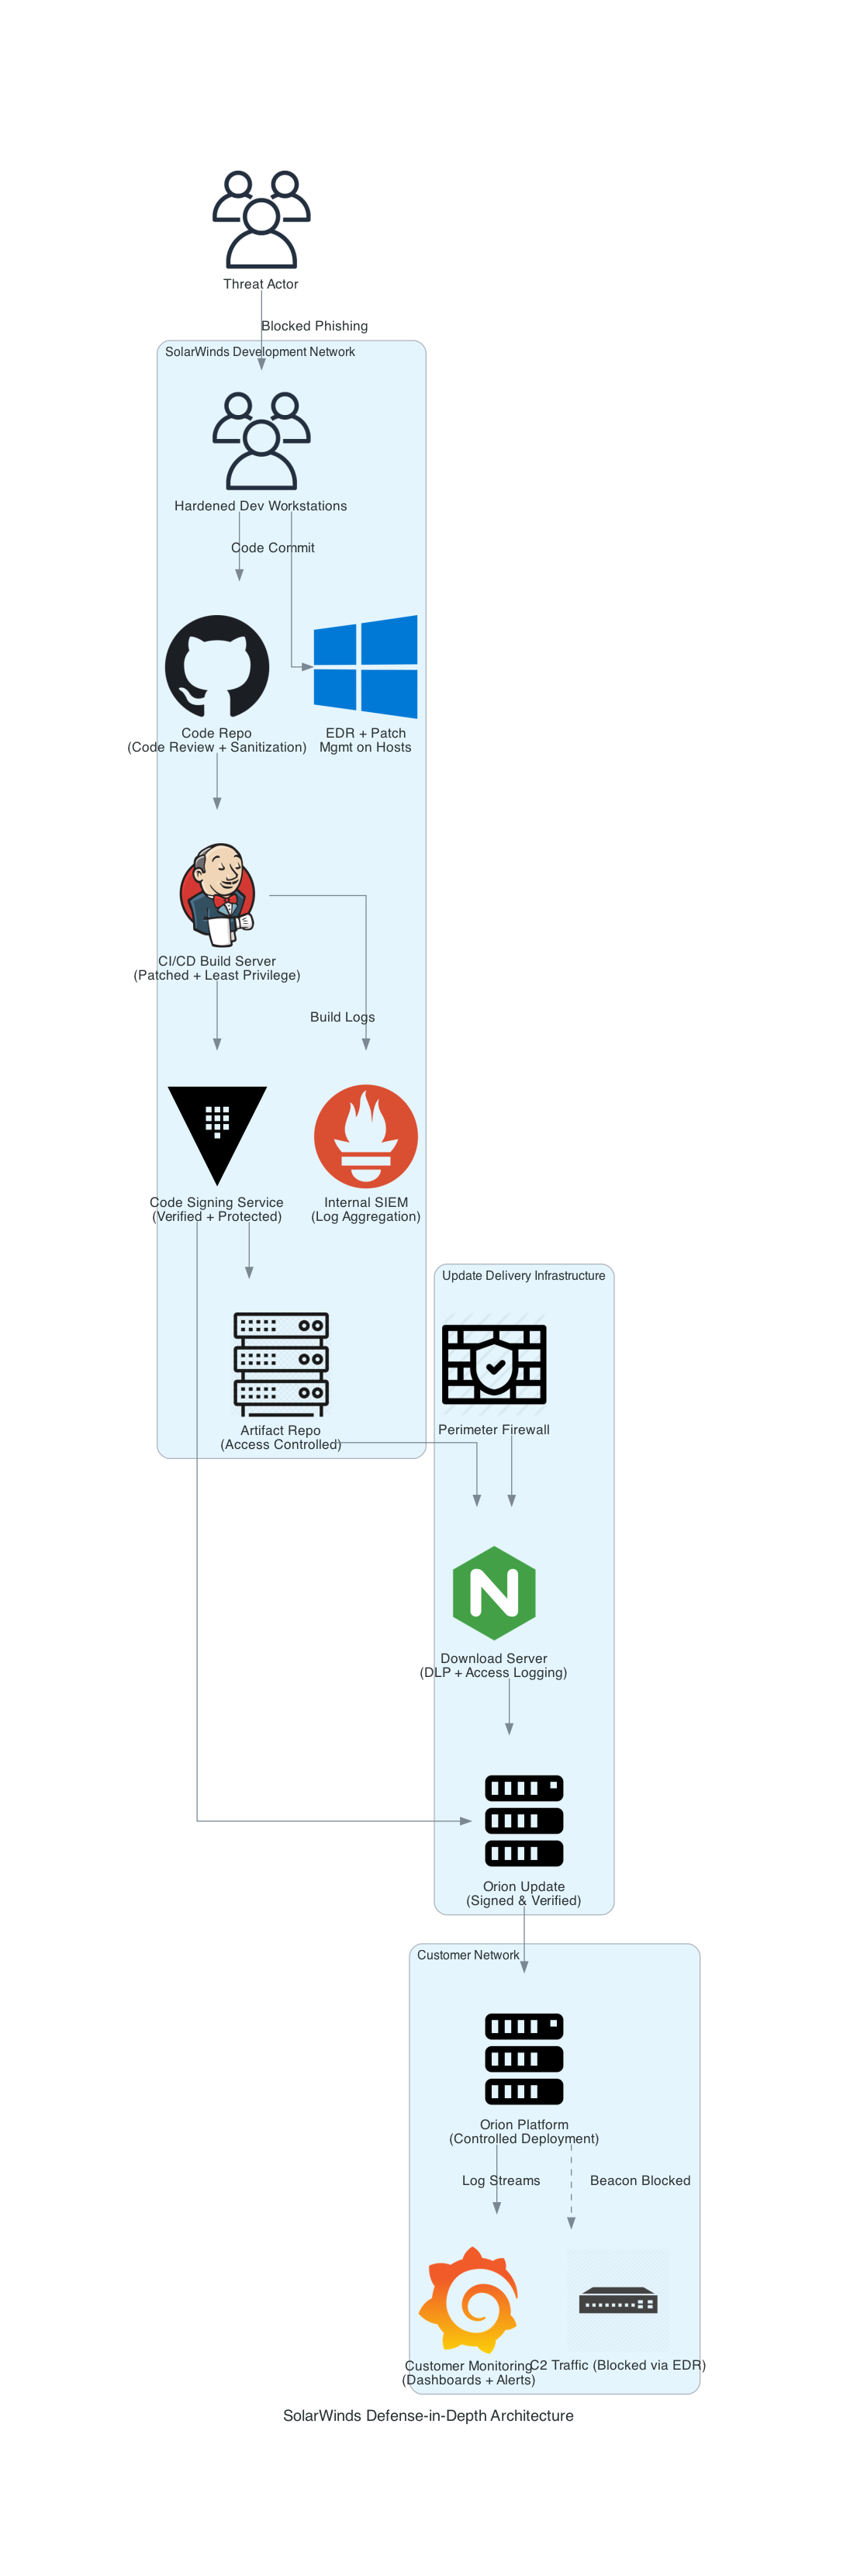

In [169]:
# DiD Controls for SolarWinds

# Control 1: Code Signing Integrity Verification
# Applies to: Build Pipeline (CI/CD and Signing Service)
# Reason: Prevents tampering by enforcing cryptographic validation and policy-based signing checks

# Control 2: Endpoint Hardening with EDR and Patch Management
# Applies to: Developer Workstations and Build Servers
# Reason: Detects malware injection attempts (e.g., SUNBURST) and reduces attack surface through timely updates

# Control 3: Network Segmentation and Monitoring
# Applies to: Dev Network, CI/CD Servers, and Signing Infrastructure
# Reason: Limits lateral movement from compromised endpoints and enables detection of abnormal traffic

# Control 4: Multi-Factor Authentication (MFA) and Privileged Access Management (PAM)
# Applies to: Developer Accounts, Build Access, and Artifact Repositories
# Reason: Reduces risk of compromised credentials and unauthorized code changes

# Control 5: Software Bill of Materials (SBOM) + Static Analysis Tools
# Applies to: Source Code, Open Source Components, and Build Artifacts
# Reason: Identifies unauthorized or unverified third-party dependencies and ensures build-time transparency

# Control 6: SIEM Integration and Behavior Analytics
# Applies to: Developer Network, Code Repos, Signing Systems
# Reason: Aggregates logs, monitors for anomalies (e.g., unknown repo access), and supports incident response

# DiD Architecture Diagram for SolarWinds

# Create output directory
if not os.path.exists("cyberarch"):
    os.makedirs("cyberarch")

# Define the architecture
with Diagram("SolarWinds Defense-in-Depth Architecture", show=False, direction="TB", outformat="png", filename="cyberarch/solarwinds_did_architecture"):

    # External Attacker (still attempting access)
    attacker = Users("Threat Actor")

    # SolarWinds Dev Network with DiD Controls
    with Cluster("SolarWinds Development Network"):
        dev_users = Users("Hardened Dev Workstations")
        git_repo = Github("Code Repo\n(Code Review + Sanitization)")
        jenkins = Jenkins("CI/CD Build Server\n(Patched + Least Privilege)")
        signing = Vault("Code Signing Service\n(Verified + Protected)")
        artifact_repo = Storage("Artifact Repo\n(Access Controlled)")
        edr = Windows("EDR + Patch\nMgmt on Hosts")
        siem = Prometheus("Internal SIEM\n(Log Aggregation)")

        dev_users >> Edge(label="Code Commit") >> git_repo
        git_repo >> jenkins >> signing >> artifact_repo
        dev_users >> edr
        jenkins >> Edge(label="Build Logs") >> siem

        attacker >> Edge(label="Blocked Phishing") >> dev_users

    # Update Distribution Channel
    with Cluster("Update Delivery Infrastructure"):
        firewall = Firewall("Perimeter Firewall")
        nginx = Nginx("Download Server\n(DLP + Access Logging)")
        signed_package = Server("Orion Update\n(Signed & Verified)")

        artifact_repo >> nginx
        signing >> signed_package
        firewall >> nginx >> signed_package

    # Customer Network with Monitoring
    with Cluster("Customer Network"):
        orion = Server("Orion Platform\n(Controlled Deployment)")
        c2 = Switch("C2 Traffic (Blocked via EDR)")
        customer_siem = Grafana("Customer Monitoring\n(Dashboards + Alerts)")

        signed_package >> orion
        orion >> Edge(label="Log Streams") >> customer_siem
        orion >> Edge(style="dashed", label="Beacon Blocked") >> c2

# Show diagram
image_path = "cyberarch/solarwinds_did_architecture.png"
display(Image(filename=image_path))

### DiD Controls Table

| **Control**                                         | **Where It Applies**                              | **Reason (Rationale)**                                                                                  |
|-----------------------------------------------------|--------------------------------------------------|----------------------------------------------------------------------------------------------------------|
| Code Signing Integrity Verification                 | Build Pipeline (CI/CD and Signing Service)        | Prevents tampering by enforcing cryptographic validation and policy-based signing checks                |
| Endpoint Hardening with EDR and Patch Management    | Developer Workstations and Build Servers          | Detects malware injection (e.g., SUNBURST) and reduces the attack surface through timely updates        |
| Network Segmentation and Monitoring                 | Dev Network, CI/CD Servers, Signing Infrastructure| Limits lateral movement and enables detection of abnormal internal traffic                              |
| MFA and Privileged Access Management (PAM)          | Developer Accounts, Build Access, Artifact Repos  | Reduces risk of compromised credentials and unauthorized access to sensitive build processes            |
| SBOM + Static Analysis for Code Integrity           | Source Code, Open Source Dependencies, Build Artifacts | Detects unauthorized third-party packages and ensures build-time transparency                      |


## Zero Trust Architecture


### Question 7: Plan Your Zero Trust Controls
How will you apply Zero Trust to mitigate the SolarWinds breach issues? List 5 controls in the comments below.


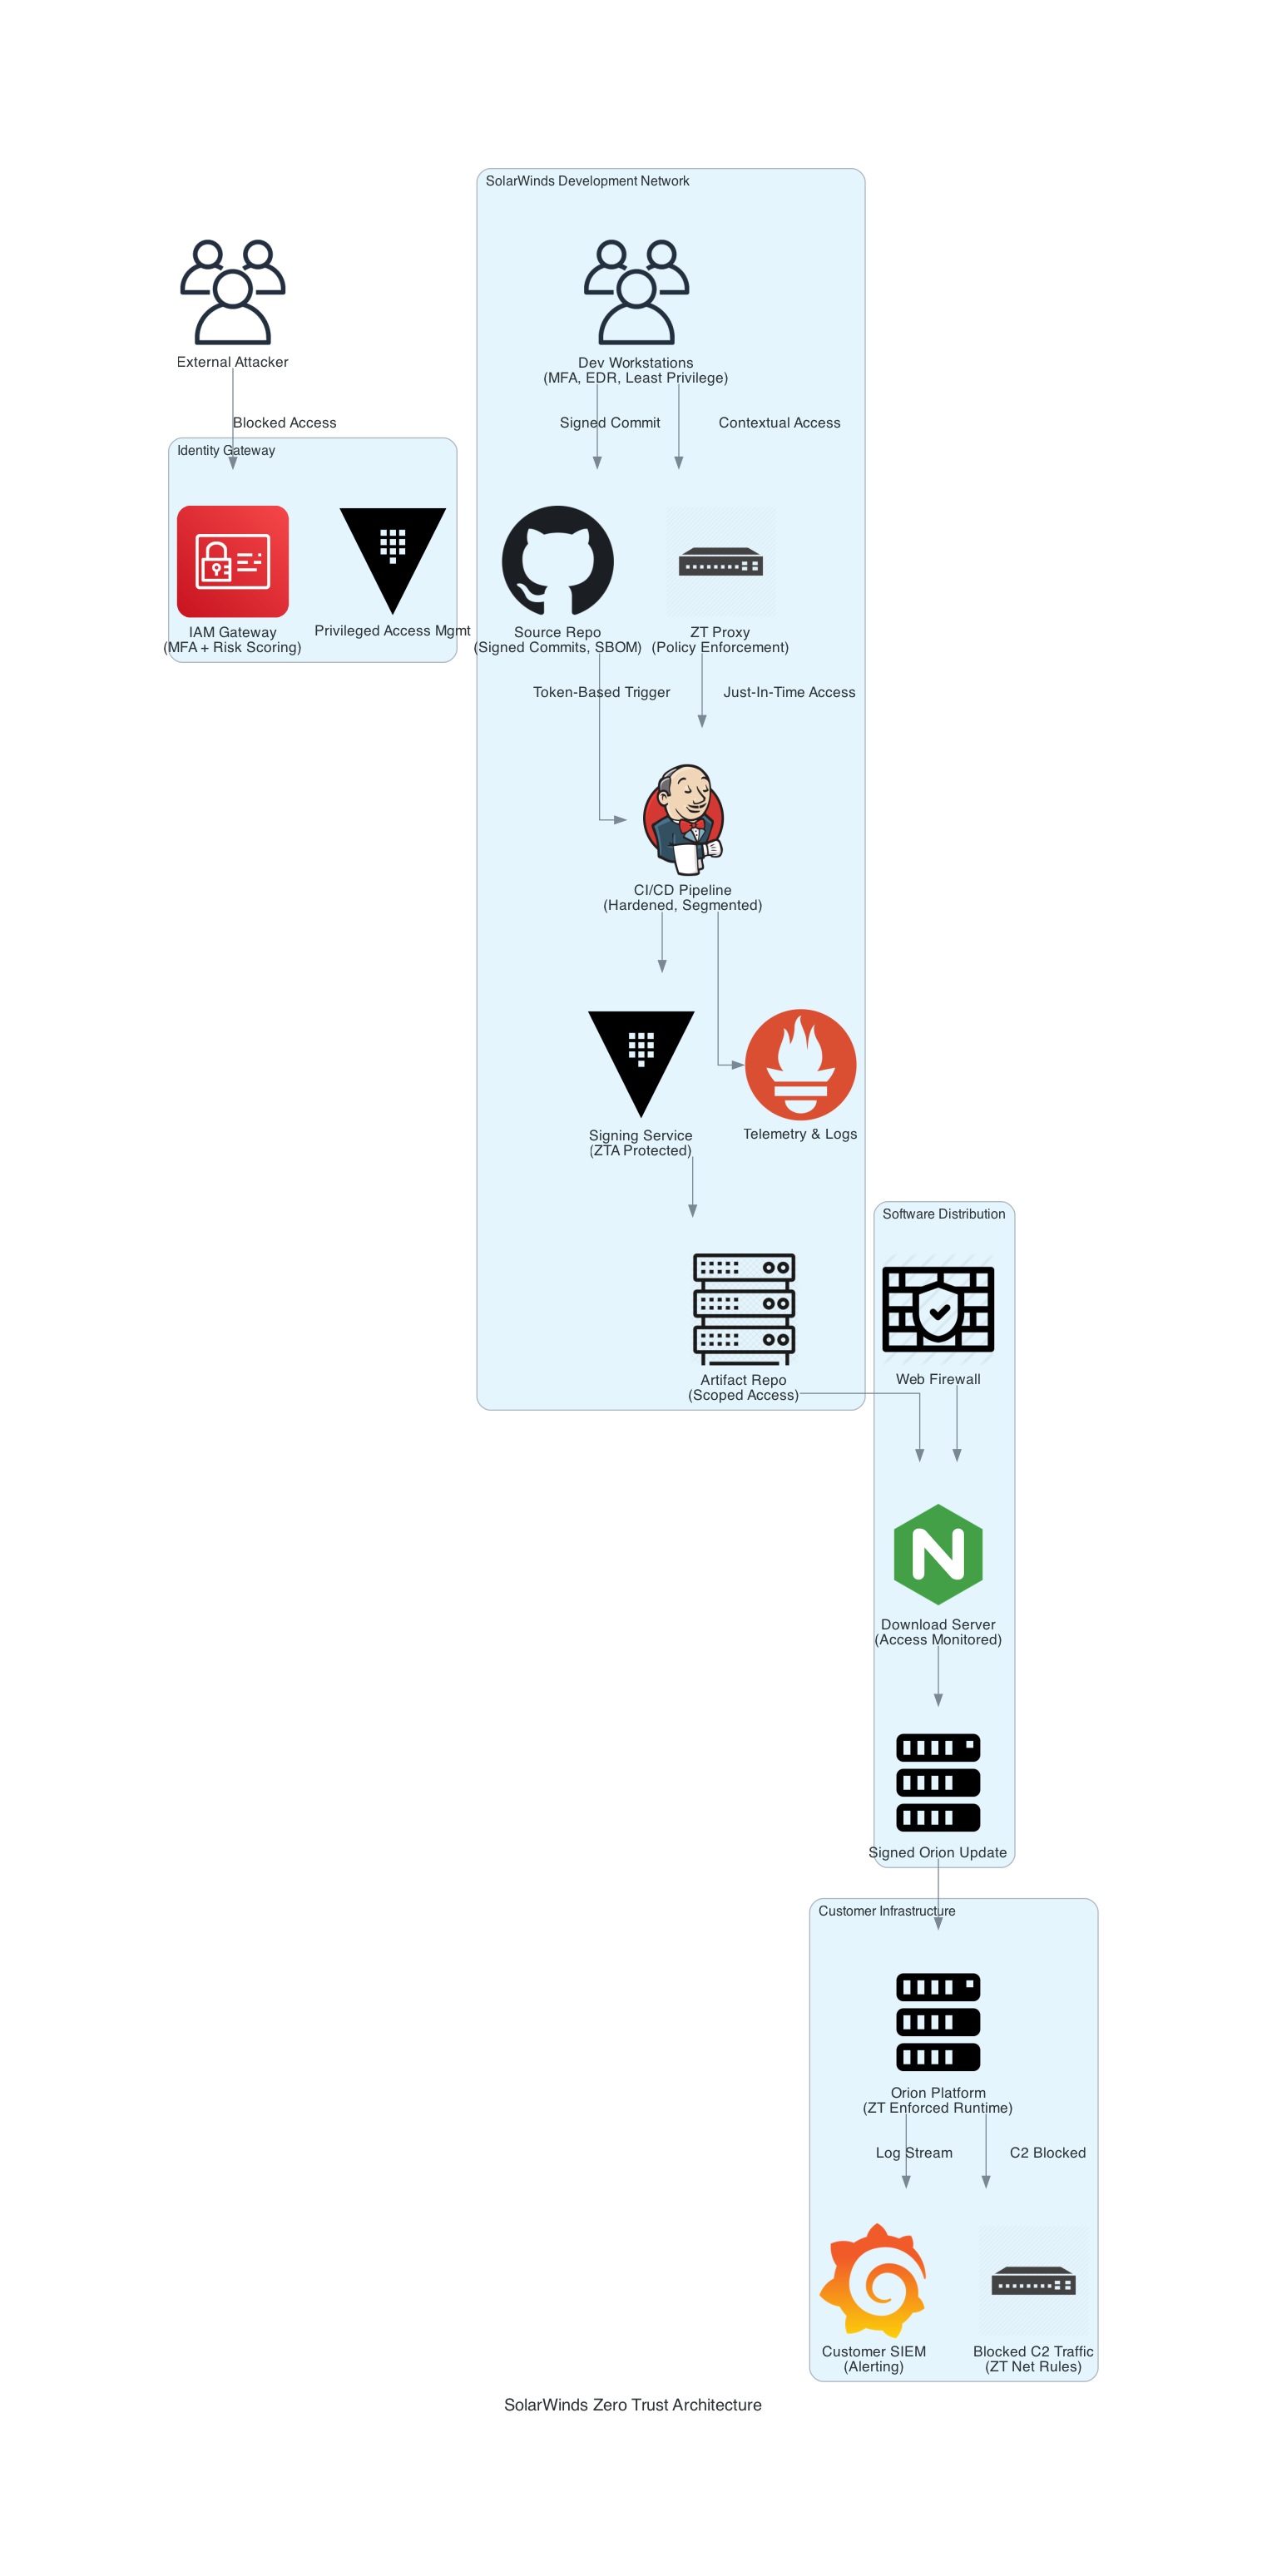

In [170]:
# Zero Trust Controls for SolarWinds

# Control 1: Continuous Code Signing Validation & SBOM Verification
# Applies to: Build Pipeline and Signing Systems
# Reason: Prevents tampered builds and ensures only validated artifacts from known components are signed and deployed

# Control 2: Mandatory MFA + Device Posture Checks
# Applies to: Developer Workstations, CI/CD Access, Signing Infrastructure
# Reason: Enforces strong identity verification and reduces risks from phishing or compromised credentials

# Control 3: Micro-segmentation with Least Privilege Access
# Applies to: Dev Network (CI/CD, Git Repos, Signing Services)
# Reason: Limits lateral movement in case of compromise and enforces access controls aligned with the principle of least privilege

# Control 4: mTLS and End-to-End Encryption
# Applies to: Internal Update Distribution Channels and Developer Traffic
# Reason: Protects data in transit and prevents unauthorized access, injection, or data sniffing

# Control 5: Continuous Authorization + SIEM-based Behavioral Analytics
# Applies to: Developer Network, Update Infrastructure, Artifact Repositories
# Reason: Enables real-time detection of suspicious behaviors, privilege escalations, and unauthorized update activity

# Zero Trust Architecture Diagram for SolarWinds

# Create output directory
if not os.path.exists("cyberarch"):
    os.makedirs("cyberarch")

# Define the improved ZTA architecture for SolarWinds
with Diagram("SolarWinds Zero Trust Architecture", show=False, direction="TB", outformat="png", filename="cyberarch/solarwinds_zta_architecture"):

    # External Threat Actor
    attacker = Users("External Attacker")

    # Identity & Access Controls
    with Cluster("Identity Gateway"):
        id_gateway = IAM("IAM Gateway\n(MFA + Risk Scoring)")
        pam = Vault("Privileged Access Mgmt")

    attacker >> Edge(label="Blocked Access") >> id_gateway

    # Development Network with ZTA Controls
    with Cluster("SolarWinds Development Network"):
        dev_user = Users("Dev Workstations\n(MFA, EDR, Least Privilege)")
        code_repo = Github("Source Repo\n(Signed Commits, SBOM)")
        ci_cd = Jenkins("CI/CD Pipeline\n(Hardened, Segmented)")
        code_sign = Vault("Signing Service\n(ZTA Protected)")
        artifact_storage = Storage("Artifact Repo\n(Scoped Access)")
        build_monitor = Prometheus("Telemetry & Logs")
        zero_trust_proxy = Switch("ZT Proxy\n(Policy Enforcement)")

        dev_user >> Edge(label="Signed Commit") >> code_repo
        code_repo >> Edge(label="Token-Based Trigger") >> ci_cd
        ci_cd >> code_sign >> artifact_storage
        dev_user >> Edge(label="Contextual Access") >> zero_trust_proxy
        ci_cd >> build_monitor
        zero_trust_proxy >> Edge(label="Just-In-Time Access") >> ci_cd

    # Update Distribution Infrastructure
    with Cluster("Software Distribution"):
        perimeter_fw = Firewall("Web Firewall")
        download_srv = Nginx("Download Server\n(Access Monitored)")
        update_pkg = Server("Signed Orion Update")

        artifact_storage >> download_srv >> update_pkg
        perimeter_fw >> download_srv

    # Customer Network (Downstream Impact)
    with Cluster("Customer Infrastructure"):
        orion_srv = Server("Orion Platform\n(ZT Enforced Runtime)")
        exfil_block = Switch("Blocked C2 Traffic\n(ZT Net Rules)")
        customer_monitor = Grafana("Customer SIEM\n(Alerting)")

        update_pkg >> orion_srv
        orion_srv >> Edge(label="Log Stream") >> customer_monitor
        orion_srv >> Edge(label="C2 Blocked") >> exfil_block

# Display in Jupyter if desired
from IPython.display import Image, display
image_path = "cyberarch/solarwinds_zta_architecture.png"
display(Image(filename=image_path))


### Zero Trust Controls Table for SolarWinds

| **Control**                                       | **Where It Applies**                                    | **Reason (Rationale)**                                                                                      |
|---------------------------------------------------|----------------------------------------------------------|--------------------------------------------------------------------------------------------------------------|
| Continuous Code Signing Validation & SBOM Checks  | Build Pipeline and Signing Systems                       | Prevents tampered builds and ensures only validated components are signed and deployed                      |
| Mandatory MFA + Device Posture Checks             | Developer Workstations, CI/CD Access, Signing Systems    | Enforces strong identity verification and reduces risks from phishing or compromised developer devices       |
| Micro-segmentation with Least Privilege Access    | Development Network (Git, CI/CD, Signing Services)       | Limits lateral movement and enforces strict access boundaries aligned with Zero Trust principles            |
| mTLS and End-to-End Encryption                    | Internal Update Distribution Channels, Dev Traffic       | Protects internal data in transit and defends against man-in-the-middle or injection attacks                |
| Continuous Authorization + SIEM-Based Analytics   | Developer Network, Artifact Repositories, Update System  | Detects abnormal activity, privilege escalation, and unauthorized changes in real time                      |


## Adaptive Security Architecture


### Question 8: Plan Your Adaptive Security Controls
How will you apply Adaptive Security to mitigate the SolarWinds breach issues? List 5 controls in the comments below.


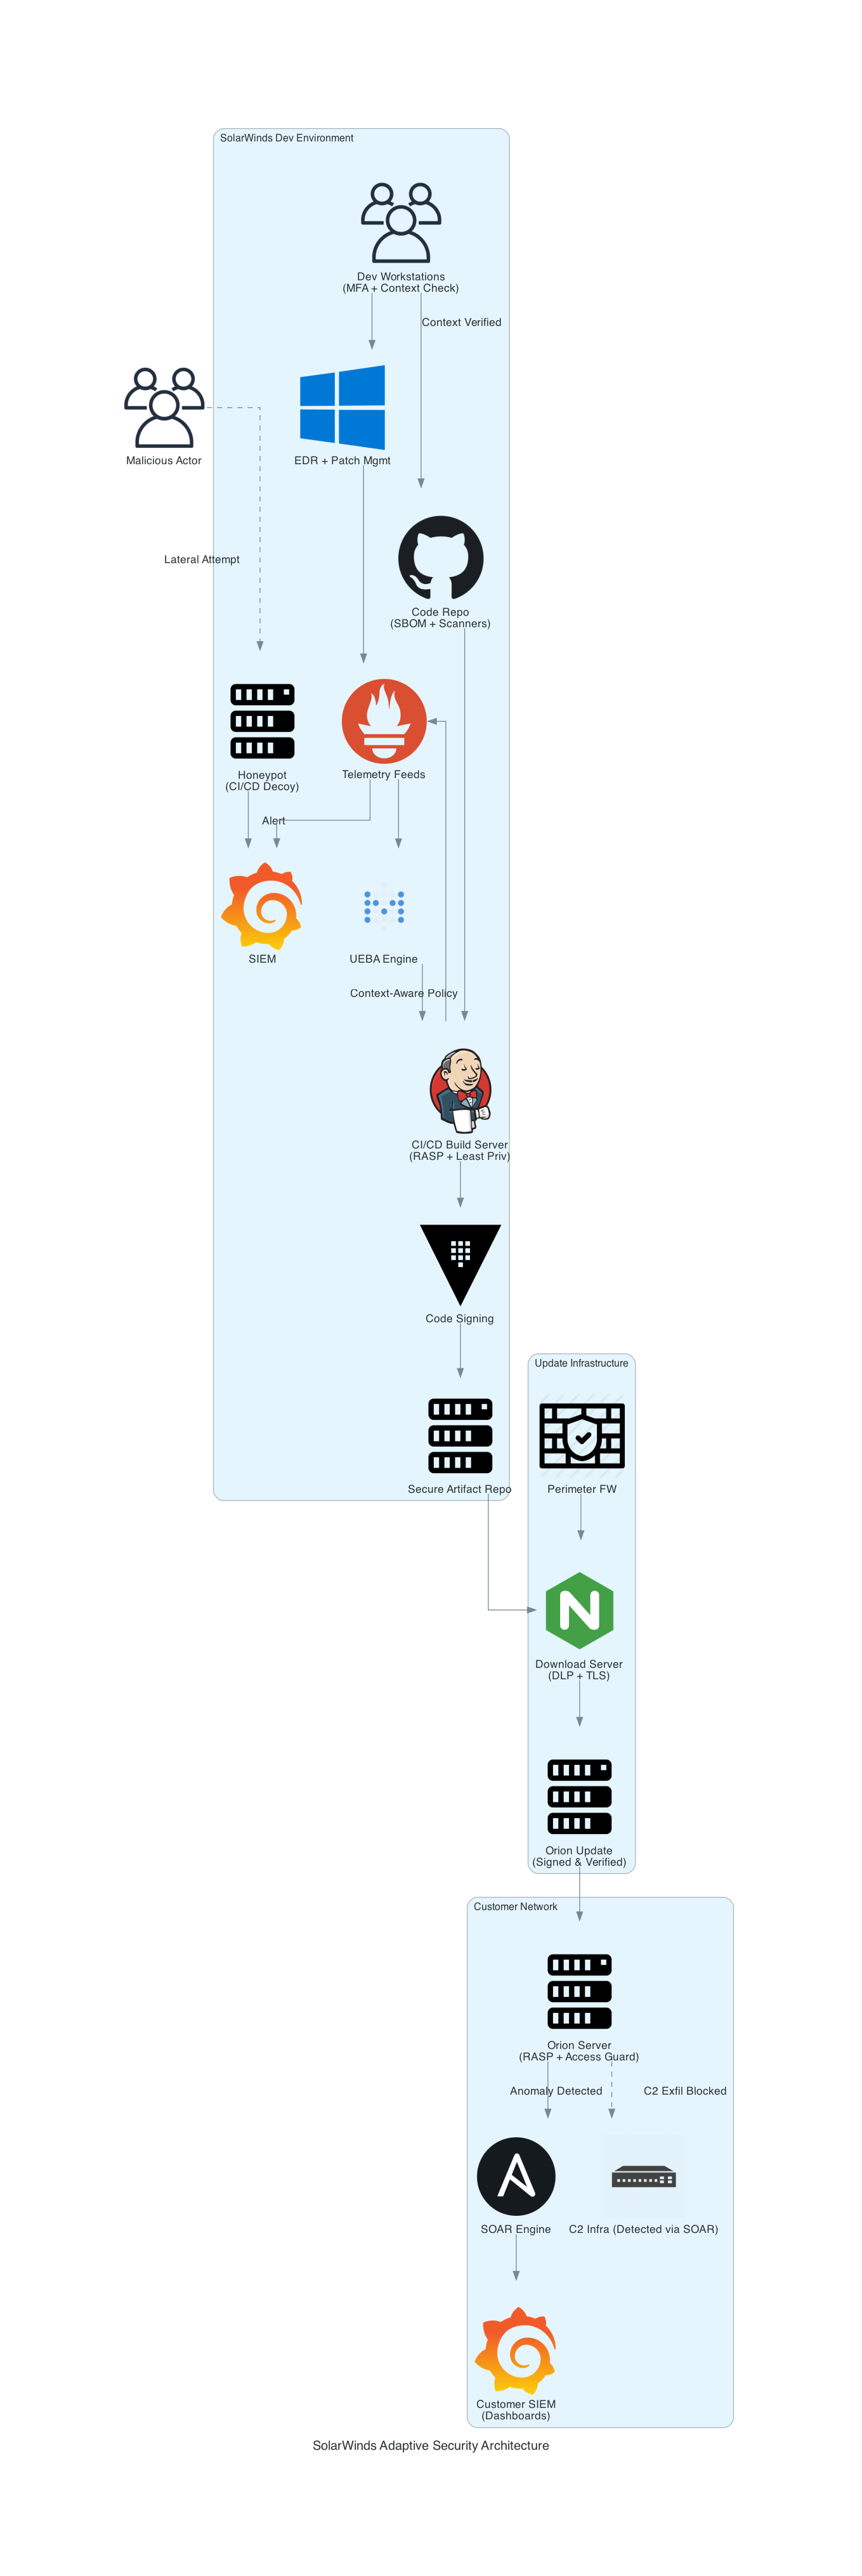

In [171]:
# Adaptive Security Controls for SolarWinds

# Control 1: Continuous Monitoring
# Applies to: Developer network, build servers, code repositories
# Reason: Collects real-time telemetry to detect lateral movement, unusual access, or unauthorized builds early

# Control 2: Behavioral Analytics (UEBA)
# Applies to: Developer accounts, CI/CD activity, code signing logs
# Reason: Flags anomalies like code pushes from unusual IPs or uncharacteristic timing patterns

# Control 3: Context-Aware Access
# Applies to: Git repos, code signing systems, artifact repositories
# Reason: Enforces dynamic access policies based on user/device context (e.g., geo, posture, risk score)

# Control 4: Deception Technology
# Applies to: Internal build infrastructure and developer subnet
# Reason: Deploys honeypots and decoys to trap attackers and trigger alerts before they reach critical systems

# Control 5: Runtime Protection
# Applies to: Orion application code and staging servers
# Reason: Uses runtime application self-protection (RASP) or eBPF to prevent execution of malicious payloads

# Control 6: Dynamic Policy Engine
# Applies to: Access decisions across build pipeline and software update servers
# Reason: Continuously evaluates behavior history and telemetry to adjust access control policies on the fly

# Control 7: Automated Response (SOAR)
# Applies to: Alerts from SIEM, endpoint, and network monitoring
# Reason: Automatically triggers containment actions like quarantining builds, disabling accounts, or blocking IPs

# Control 8: Threat Intelligence Integration
# Applies to: Perimeter firewall, build tools, artifact verification
# Reason: Uses internal and external feeds to detect known IoCs or adversary infrastructure (e.g., C2 indicators)

# Control 9: Feedback Loops
# Applies to: All control layers: SIEM, monitoring dashboards, policy engine
# Reason: Incorporates analyst triage and ML feedback to refine future alerting and tighten defenses

# Adaptive Security Architecture Diagram for SolarWinds

# Create output directory
if not os.path.exists("cyberarch"):
    os.makedirs("cyberarch")

# ASA-Enhanced Architecture
with Diagram("SolarWinds Adaptive Security Architecture", show=False, direction="TB", outformat="png", filename="cyberarch/solarwinds_asa_architecture"):

    attacker = Users("Malicious Actor")

    # SolarWinds Dev Environment with ASA Enhancements
    with Cluster("SolarWinds Dev Environment"):
        dev_users = Users("Dev Workstations\n(MFA + Context Check)")
        edr = Windows("EDR + Patch Mgmt")
        git = Github("Code Repo\n(SBOM + Scanners)")
        jenkins = Jenkins("CI/CD Build Server\n(RASP + Least Priv)")
        vault = Vault("Code Signing")
        artifact_repo = Server("Secure Artifact Repo")
        deception = Server("Honeypot\n(CI/CD Decoy)")
        behavior_analytics = Metabase("UEBA Engine")
        telemetry = Prometheus("Telemetry Feeds")
        siem = Grafana("SIEM")

        # Normal flow
        dev_users >> edr
        dev_users >> Edge(label="Context Verified") >> git
        git >> jenkins >> vault >> artifact_repo

        # Deception layer
        attacker >> Edge(style="dashed", label="Lateral Attempt") >> deception
        deception >> Edge(label="Alert") >> siem

        # Monitoring & feedback
        edr >> telemetry >> siem
        jenkins >> telemetry
        telemetry >> behavior_analytics >> Edge(label="Context-Aware Policy") >> jenkins

    # Software Distribution Channel
    with Cluster("Update Infrastructure"):
        firewall = Firewall("Perimeter FW")
        web_dl = Nginx("Download Server\n(DLP + TLS)")
        signed_pkg = Server("Orion Update\n(Signed & Verified)")

        artifact_repo >> web_dl >> signed_pkg
        firewall >> web_dl

    # Customer Network
    with Cluster("Customer Network"):
        orion = Server("Orion Server\n(RASP + Access Guard)")
        c2 = Switch("C2 Infra (Detected via SOAR)")
        customer_siem = Grafana("Customer SIEM\n(Dashboards)")
        soar = Ansible("SOAR Engine")

        signed_pkg >> orion
        orion >> Edge(label="Anomaly Detected") >> soar >> customer_siem
        orion >> Edge(style="dashed", label="C2 Exfil Blocked") >> c2

    # Display if running in Jupyter (optional)
    from IPython.display import Image, display
    image_path = "cyberarch/solarwinds_asa_architecture.png"
    display(Image(filename=image_path))

### Adaptive Security Controls Table

| **Control**                     | **Where It Applies**                              | **Reason (Rationale)**                                                                                  |
|--------------------------------|--------------------------------------------------|--------------------------------------------------------------------------------------------------------|
| Continuous Monitoring           | Developer network, build pipeline, code signing   | Captures real-time telemetry to detect suspicious changes or unauthorized activity                     |
| Behavioral Analytics (UEBA)     | Developer accounts, Jenkins, source control       | Flags deviations in user or service behavior that may indicate insider threats or compromised accounts |
| Context-Aware Access            | Git repos, signing keys, artifact storage         | Enforces access based on device trust, location, time, or behavioral baselines                         |
| Dynamic Policy Engine           | Identity and access management systems            | Modifies access rights and build permissions automatically based on detected risks                    |
| Deception Technology            | Internal dev network, CI/CD runners               | Deploys honeypots and decoys to detect lateral movement or attacker exploration                        |
| Automated Response (SOAR)       | SIEM systems and endpoint agents                  | Automatically isolates compromised systems, blocks IPs, or disables credentials upon alerts            |
| Threat Intelligence Integration | Build pipeline, firewall policies, runtime guard  | Incorporates external and internal threat data to refine detection and harden build environments       |
| Runtime Protection              | Orion binary (build output), customer deployment  | Blocks or flags malicious behavior at runtime using RASP, WAF, or endpoint-level controls              |
| Feedback Loops (Learning)       | Policy engine, detection logic, developer reviews | Refines rules and alerts over time based on triaged incident outcomes and false positives              |


# Capital One Data Breach (2019)
## Base Architecture
**Environment Chosen**: [Fill in: On-premises / AWS / Azure]


### Question 9: Describe the Base Architecture
Briefly describe the system that was compromised in the Capital One breach based on the scenario provided. What components (e.g., WAF, S3 buckets) were involved?

**Your Answer**: The compromised system in the Capital One breach was a cloud-native architecture deployed on Amazon Web Services (AWS), comprising several tightly integrated components. At the perimeter, a misconfigured Web Application Firewall (WAF) running ModSecurity on an EC2 instance served as a reverse proxy and introduced a Server-Side Request Forgery (SSRF) vulnerability. User traffic passed through an Elastic Load Balancer (ELB) to reach an EC2-based web server, which had access to the AWS Instance Metadata Service (IMDSv1). Exploiting SSRF, the attacker accessed IMDSv1 to retrieve temporary credentials for an over-permissioned IAM role (ISRM-WAF-Role). This role granted extensive access to Amazon S3 buckets storing encrypted personally identifiable information (PII) and credit application data. Although AWS Key Management Service (KMS) managed the encryption, the IAM role had decryption privileges, allowing unauthorized data access. Despite the presence of monitoring tools like CloudWatch, the system failed to detect or respond to months-long anomalous activity, ultimately enabling data exfiltration without raising alerts.


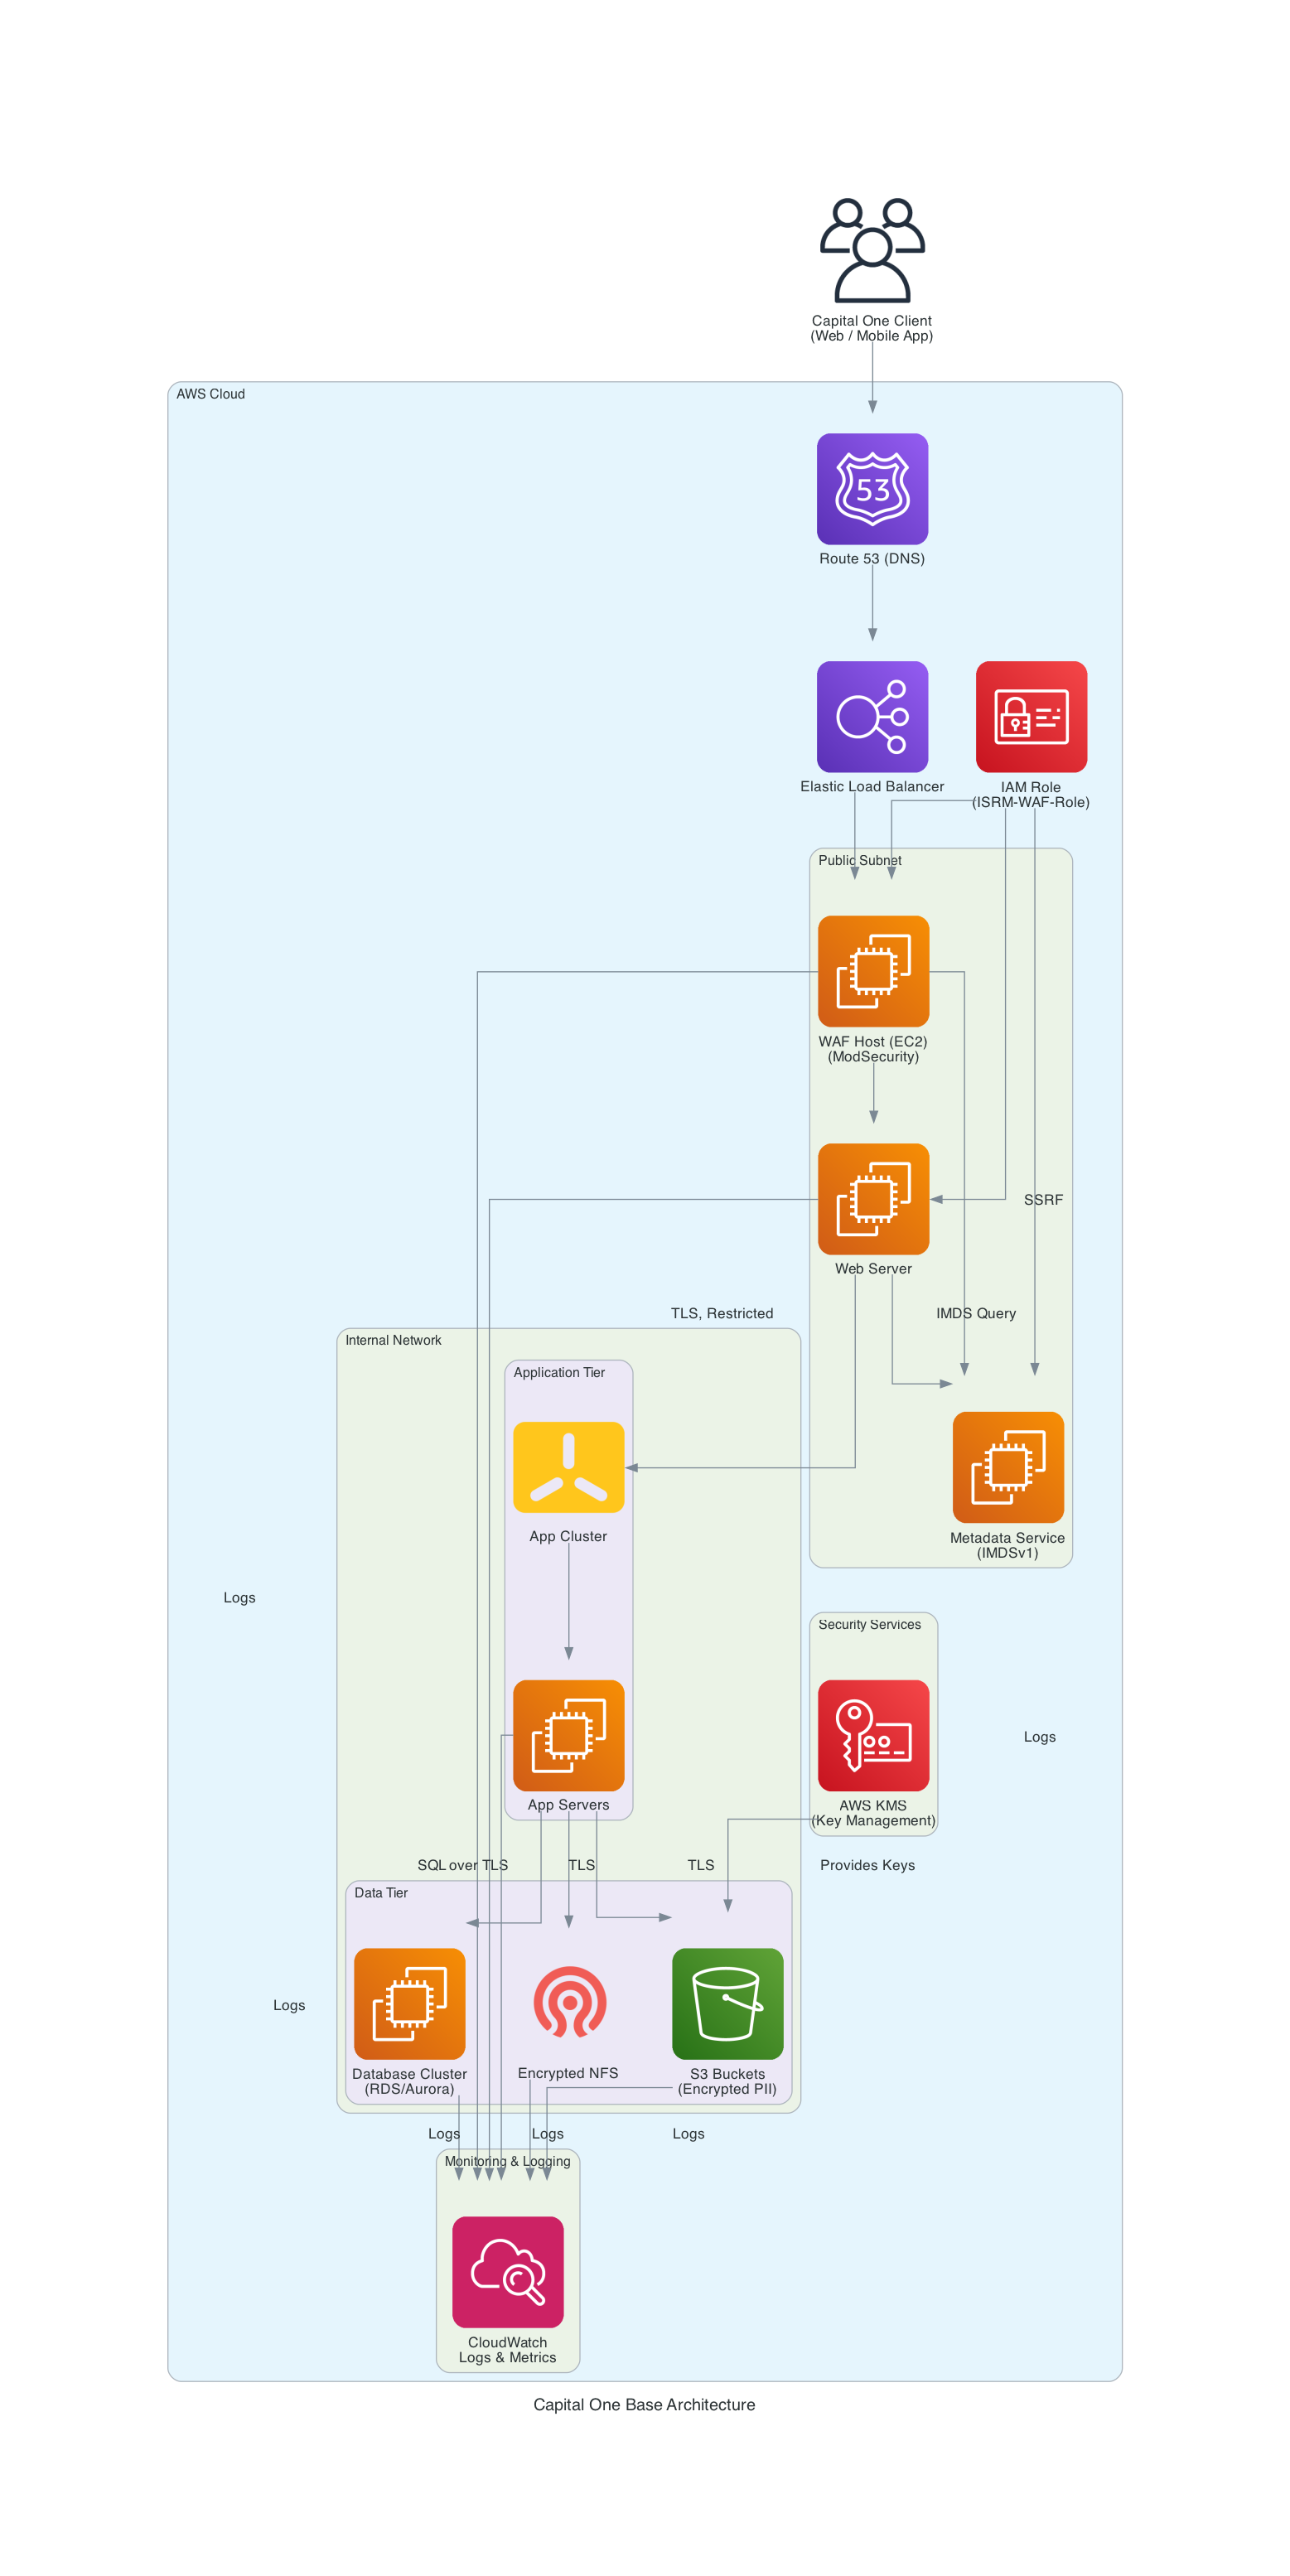

In [172]:
# Create output directory
if not os.path.exists("cyberarch"):
    os.makedirs("cyberarch")

with Diagram("Capital One Base Architecture", 
             show=False, direction="TB", outformat="png", 
             filename="cyberarch/capitalone_base_architecture"):

    # External User
    user = Users("Capital One Client\n(Web / Mobile App)")

    # AWS Cloud Boundary
    with Cluster("AWS Cloud"):

        # Global Services
        dns = Route53("Route 53 (DNS)")
        elb = ELB("Elastic Load Balancer")
        iam_role = IAM("IAM Role\n(ISRM-WAF-Role)")

        # Public Subnet (Web Layer)
        with Cluster("Public Subnet"):
            waf_ec2 = EC2("WAF Host (EC2)\n(ModSecurity)")
            web_server = EC2("Web Server")
            metadata = EC2("Metadata Service\n(IMDSv1)")

            waf_ec2 >> web_server
            waf_ec2 >> Edge(label="SSRF") >> metadata
            web_server >> Edge(label="IMDS Query") >> metadata

            iam_role >> waf_ec2
            iam_role >> web_server
            iam_role >> metadata

        # Internal Network (Segmented)
        with Cluster("Internal Network"):
            # Application Tier
            with Cluster("Application Tier"):
                k8s = Kubernetes("App Cluster")
                app_servers = EC2("App Servers")
                web_server >> Edge(label="TLS, Restricted") >> k8s
                k8s >> app_servers

            # Data Tier
            with Cluster("Data Tier"):
                db = S3("S3 Buckets\n(Encrypted PII)")
                db_cluster = EC2("Database Cluster\n(RDS/Aurora)")
                nfs = NetworkFileSystem("Encrypted NFS")

                app_servers >> Edge(label="TLS") >> db
                app_servers >> Edge(label="SQL over TLS") >> db_cluster
                app_servers >> Edge(label="TLS") >> nfs

        # Security Services (Control Plane)
        with Cluster("Security Services"):
            kms = KMS("AWS KMS\n(Key Management)")

            kms >> Edge(label="Provides Keys") >> db

        # Monitoring Layer
        with Cluster("Monitoring & Logging"):
            monitoring = Cloudwatch("CloudWatch\nLogs & Metrics")
            waf_ec2 >> Edge(label="Logs") >> monitoring
            web_server >> Edge(label="Logs") >> monitoring
            app_servers >> Edge(label="Logs") >> monitoring
            db >> Edge(label="Logs") >> monitoring
            db_cluster >> Edge(label="Logs") >> monitoring
            nfs >> Edge(label="Logs") >> monitoring

    # External user access path
    user >> dns >> elb >> waf_ec2

# Display in Jupyter
image_path = "cyberarch/capitalone_base_architecture.png"
display(Image(filename=image_path))

## Defense in Depth (DiD) Architecture


### Question 10: Plan Your DiD Controls
How will you apply Defense in Depth to mitigate the Capital One breach issues? List 5 controls in the comments below.


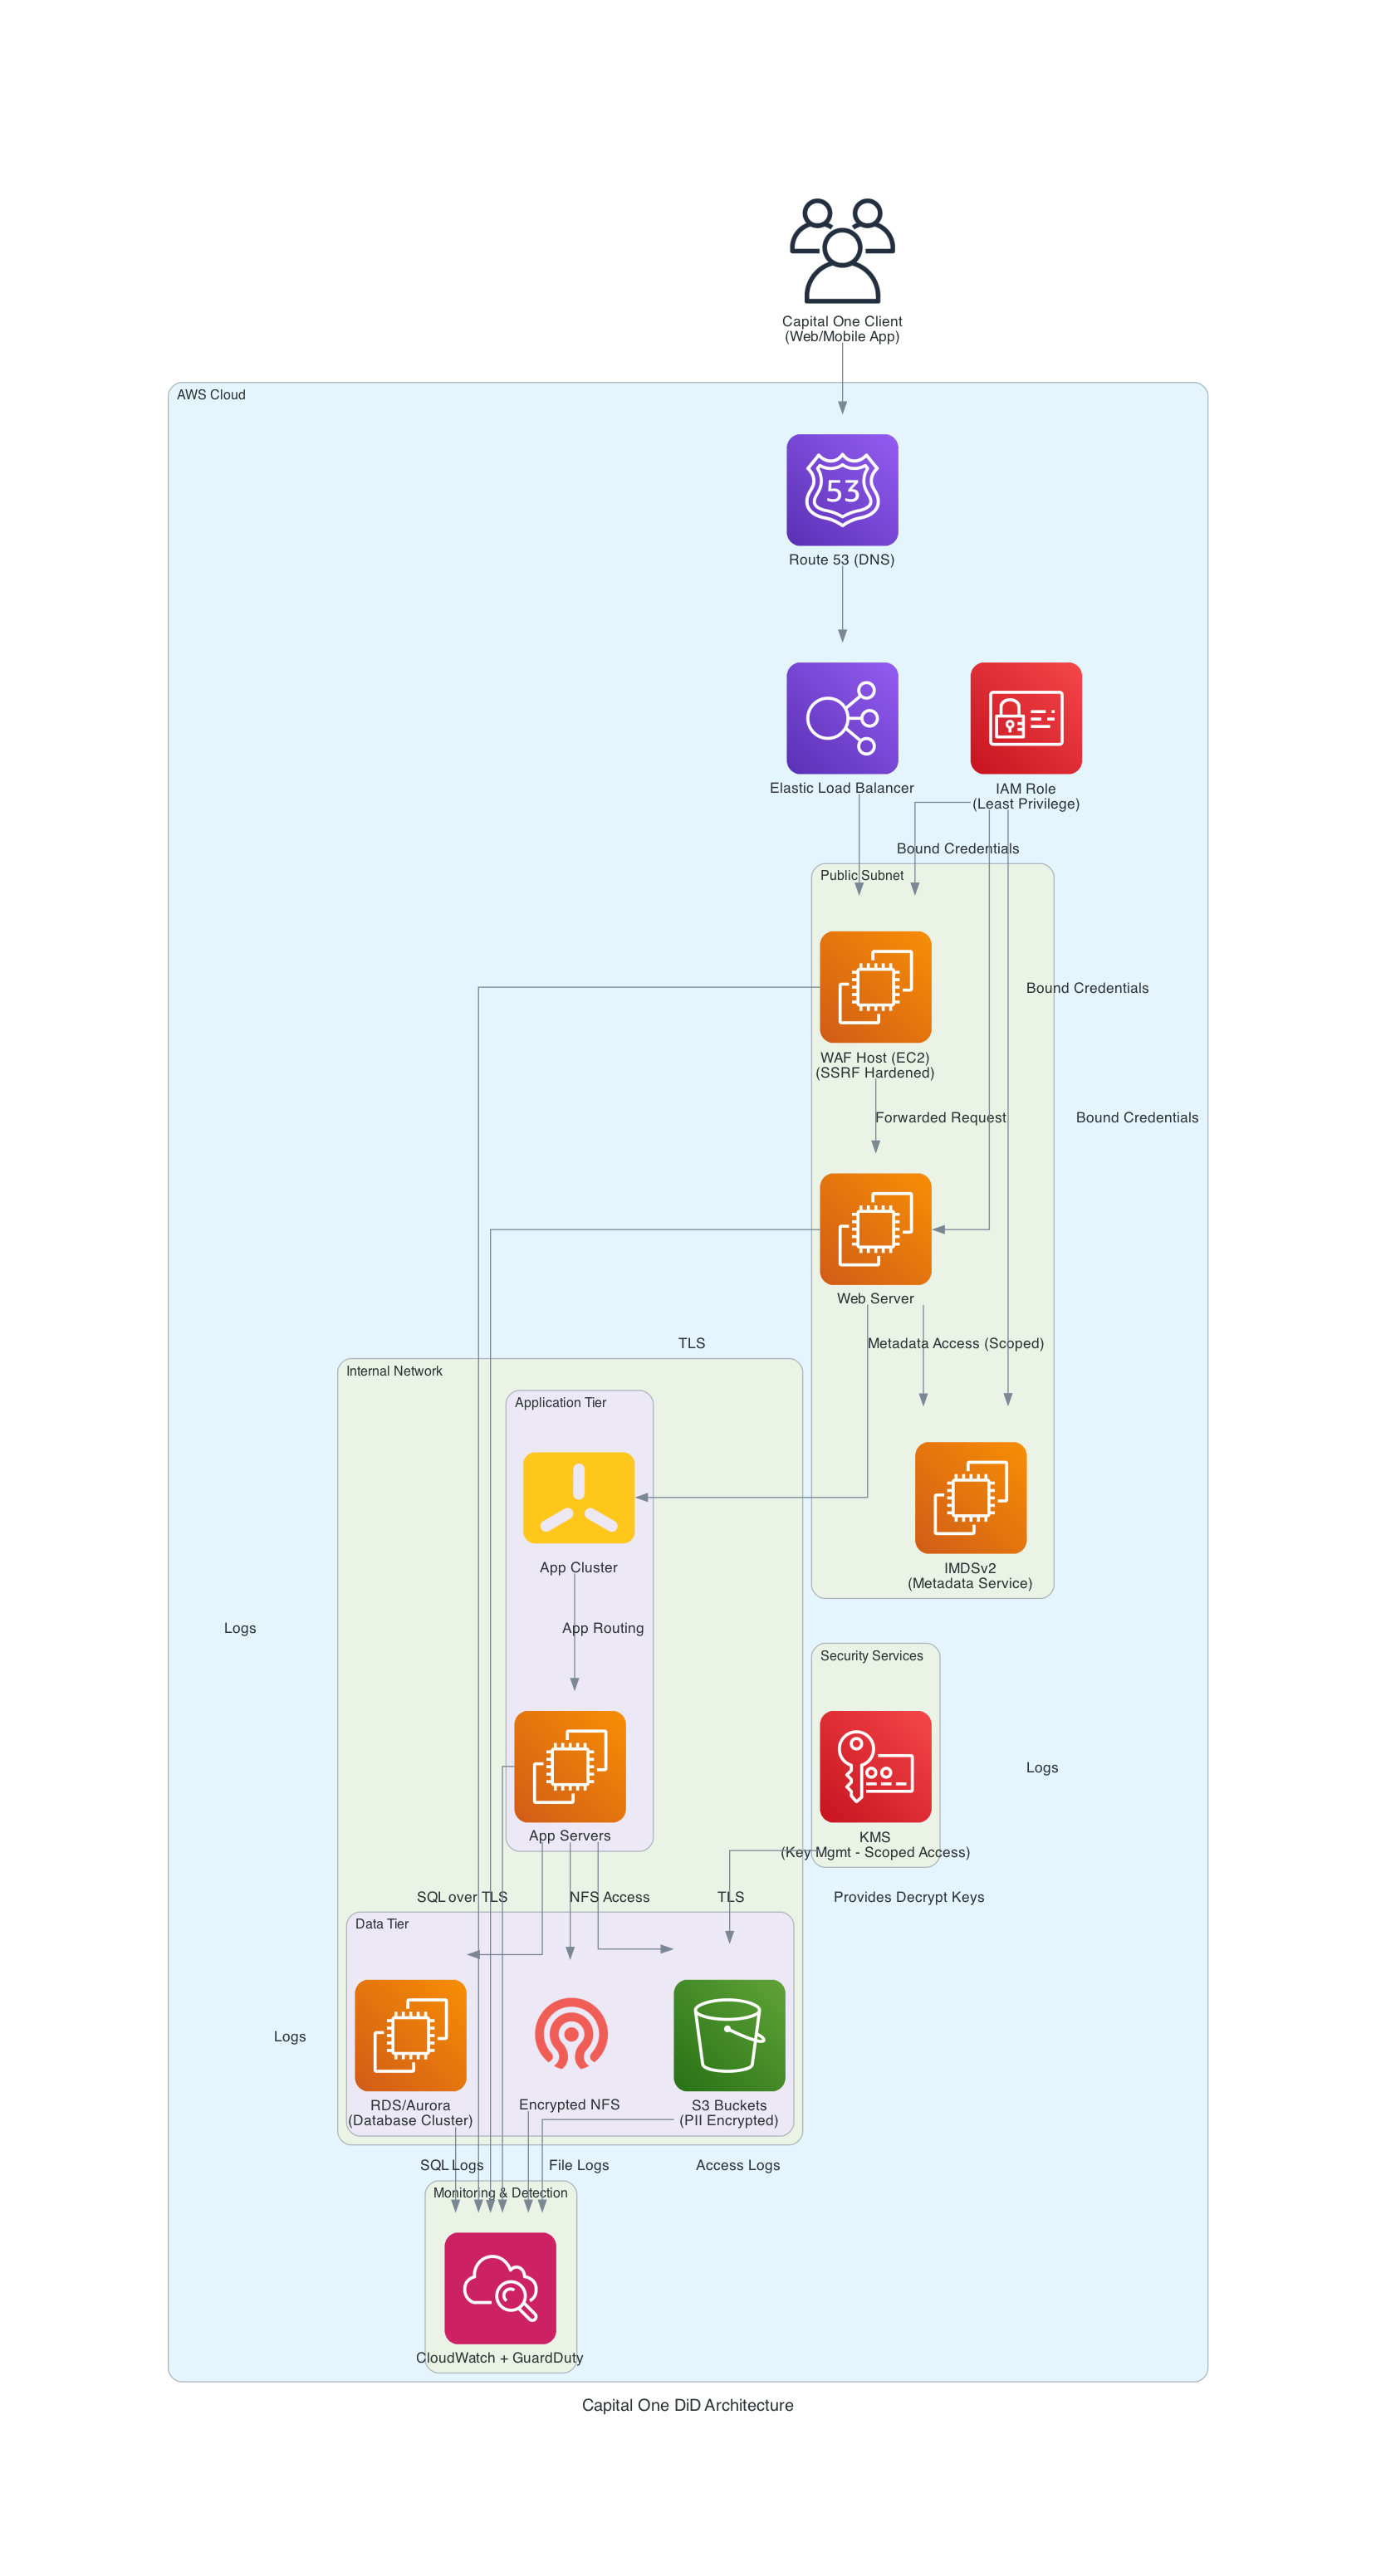

In [173]:
# DiD Controls for Capital One (Refined)

# Control 1: Hardened WAF Configuration with SSRF Protection
# Applies to: ModSecurity WAF on EC2
# Reason: Prevents Server-Side Request Forgery (SSRF) by enforcing secure reverse proxy rules and input validation

# Control 2: Metadata Service Hardening (IMDSv2 + Egress Restrictions)
# Applies to: AWS EC2 Instances using IAM Roles
# Reason: Enforces token-based identity metadata requests and restricts outbound traffic to prevent abuse via SSRF

# Control 3: IAM Role Scoping with Least Privilege Enforcement
# Applies to: All IAM Roles, especially those attached to EC2 instances
# Reason: Prevents excessive access (e.g., kms:decrypt, list/read all buckets) and supports segmentation of duties

# Control 4: S3 Bucket Policy Enforcement + Scoped KMS Keys
# Applies to: Amazon S3 Buckets and AWS KMS
# Reason: Ensures only authorized roles can decrypt or list sensitive data, even if temporary credentials are leaked

# Control 5: Anomaly Detection & Behavioral Monitoring (TOR/VPN Aware)
# Applies to: CloudWatch, GuardDuty, and Flow Logs
# Reason: Identifies suspicious activity (e.g., TOR-based access, large data exfiltration) and triggers early alerts

# DiD Architecture Diagram for Capital One

# Create output directory
if not os.path.exists("cyberarch"):
    os.makedirs("cyberarch")

with Diagram("Capital One DiD Architecture", show=False, direction="TB", outformat="png", filename="cyberarch/capitalone_did_architecture"):

    # External User
    user = Users("Capital One Client\n(Web/Mobile App)")

    # AWS Cloud Boundary
    with Cluster("AWS Cloud"):

        # Global Services
        dns = Route53("Route 53 (DNS)")
        elb = ELB("Elastic Load Balancer")
        iam_role = IAM("IAM Role\n(Least Privilege)")

        # Public Subnet (Web Layer)
        with Cluster("Public Subnet"):
            waf_ec2 = EC2("WAF Host (EC2)\n(SSRF Hardened)")
            web_server = EC2("Web Server")
            metadata = EC2("IMDSv2\n(Metadata Service)")

            waf_ec2 >> Edge(label="Forwarded Request") >> web_server
            web_server >> Edge(label="Metadata Access (Scoped)") >> metadata
            iam_role >> Edge(label="Bound Credentials") >> [waf_ec2, web_server, metadata]

        # Internal Network (Segmented)
        with Cluster("Internal Network"):
            with Cluster("Application Tier"):
                k8s = Kubernetes("App Cluster")
                app_servers = EC2("App Servers")
                web_server >> Edge(label="TLS") >> k8s
                k8s >> Edge(label="App Routing") >> app_servers

            with Cluster("Data Tier"):
                db = S3("S3 Buckets\n(PII Encrypted)")
                db_cluster = EC2("RDS/Aurora\n(Database Cluster)")
                nfs = NetworkFileSystem("Encrypted NFS")

                app_servers >> Edge(label="TLS") >> db
                app_servers >> Edge(label="SQL over TLS") >> db_cluster
                app_servers >> Edge(label="NFS Access") >> nfs

        # Security Control Plane
        with Cluster("Security Services"):
            kms = KMS("KMS\n(Key Mgmt - Scoped Access)")
            kms >> Edge(label="Provides Decrypt Keys") >> db

        # Monitoring & Detection Layer
        with Cluster("Monitoring & Detection"):
            monitor = Cloudwatch("CloudWatch + GuardDuty")
            waf_ec2 >> Edge(label="Logs") >> monitor
            web_server >> Edge(label="Logs") >> monitor
            app_servers >> Edge(label="Logs") >> monitor
            db >> Edge(label="Access Logs") >> monitor
            db_cluster >> Edge(label="SQL Logs") >> monitor
            nfs >> Edge(label="File Logs") >> monitor

    # External User Flow
    user >> dns >> elb >> waf_ec2

# Display in Jupyter
image_path = "cyberarch/capitalone_did_architecture.png"
Image(filename=image_path)

### Defense-in-Depth (DiD) Controls for Capital One

| **Control**                                           | **Where It Applies**                       | **Reason (Rationale)**                                                                 |
|-------------------------------------------------------|--------------------------------------------|------------------------------------------------------------------------------------------|
| Hardened WAF Configuration with SSRF Protection       | ModSecurity WAF on EC2                     | Prevents Server-Side Request Forgery via strict reverse proxy rules and request filtering |
| Metadata Service Hardening (IMDSv2 + Egress Controls) | AWS EC2 Instances                          | Ensures metadata access is secure and only from the instance itself                      |
| IAM Role Scoping with Least Privilege                 | IAM Roles (e.g., ISRM-WAF-Role)            | Limits access scope to prevent wide permissions like list/read/decrypt on S3             |
| S3 Bucket Policies & Scoped KMS Key Usage             | Amazon S3 Buckets, AWS KMS                 | Prevents unauthorized access/decryption of sensitive data using tightly scoped policies  |
| Anomaly Detection & Behavioral Monitoring             | CloudWatch, GuardDuty, Flow Logs           | Detects abnormal activity (TOR/VPN access, large transfers) and triggers early alerts    |

## Zero Trust Architecture


### Question 11: Plan Your Zero Trust Controls
How will you apply Zero Trust to mitigate the Capital One breach issues? List 5 controls in the comments below.


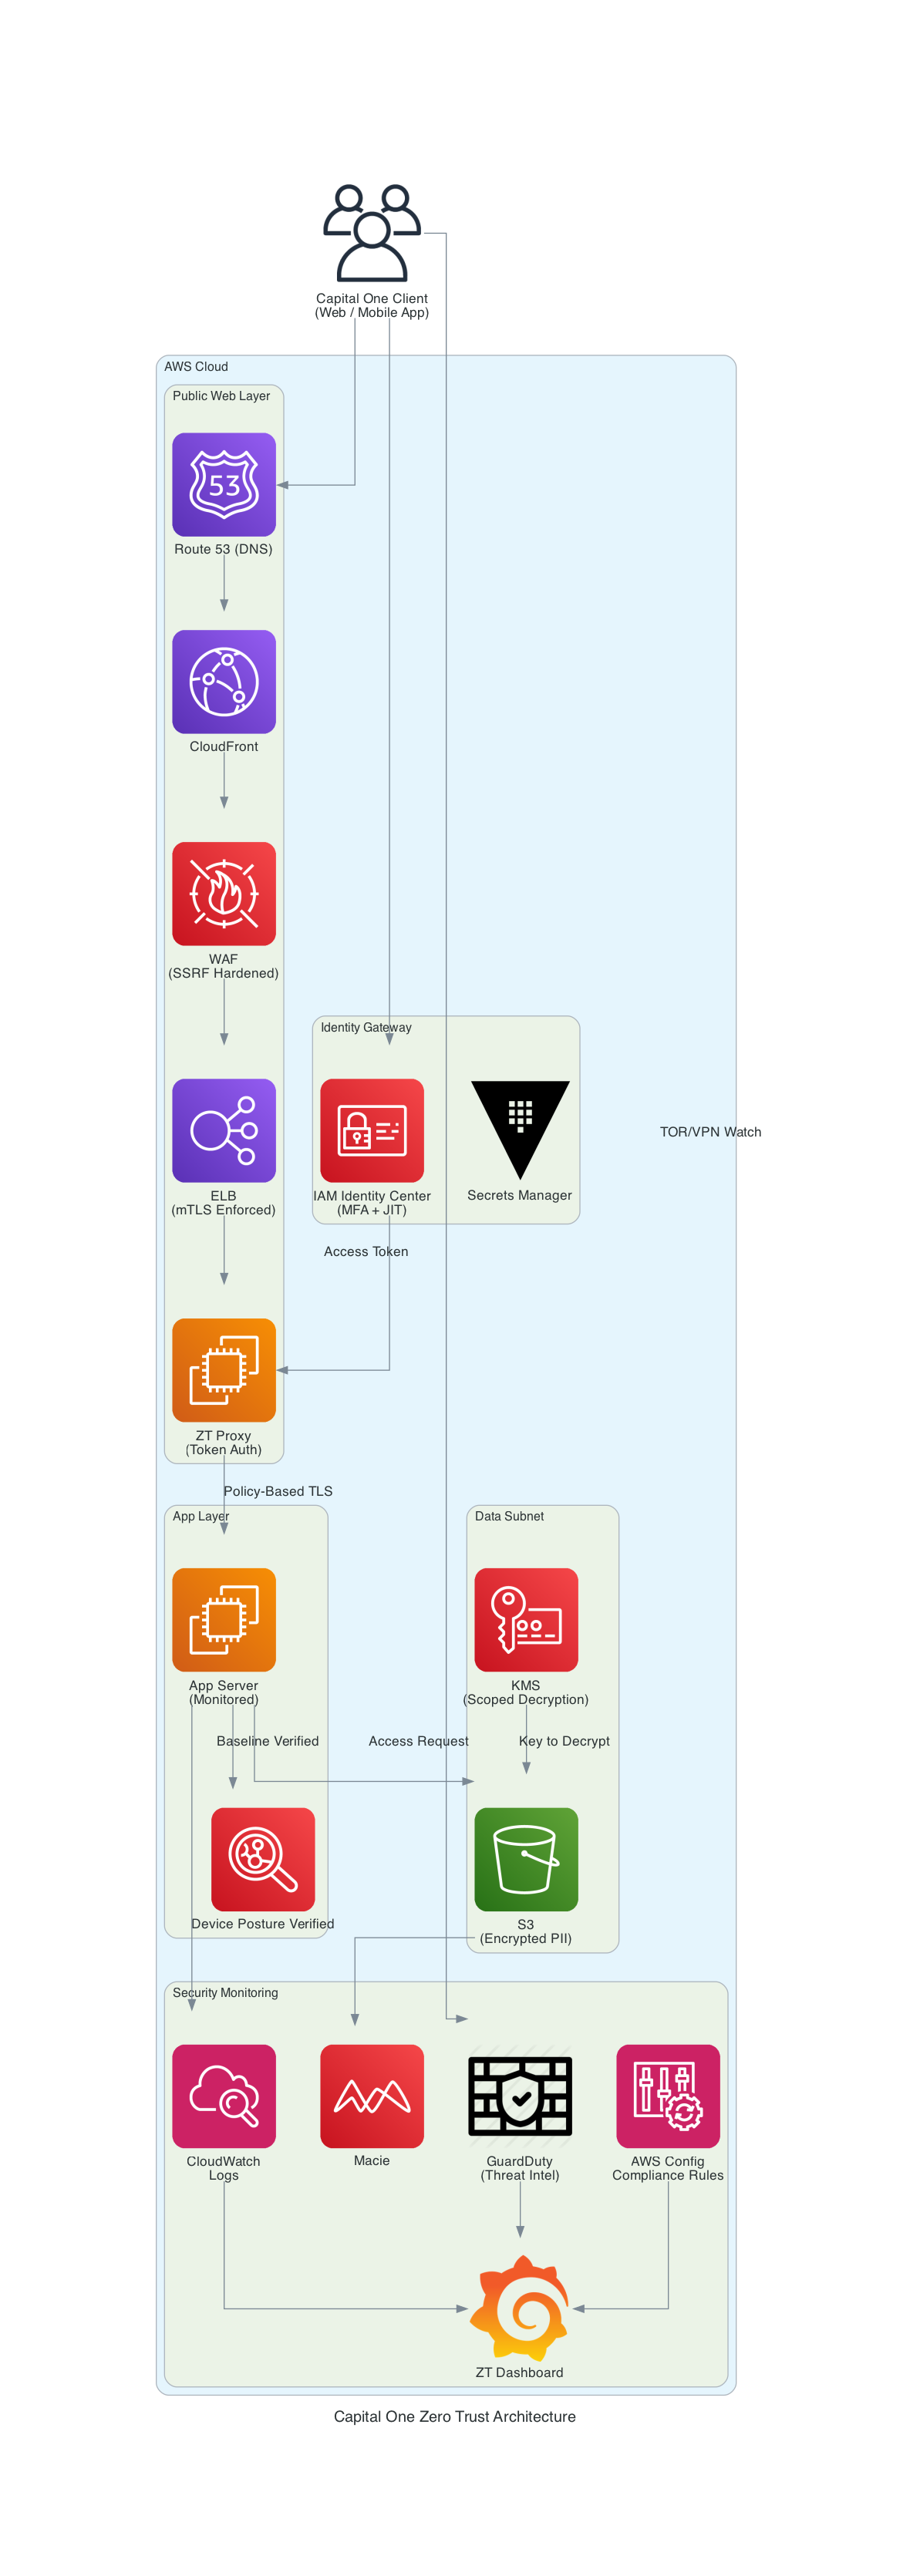

In [174]:
# ZTA Controls for Capital One (Extended based on the class notes)

# Control 1: Identity Verification with IAM Identity Center (SSO + MFA)
# Applies to: All user and system access (e.g., developers, operators)
# Reason: Ensures strong authentication, role-based access, and session enforcement

# Control 2: Device Posture Assessment (Inspector or Systems Manager)
# Applies to: EC2 Instances (e.g., WAF host, app servers)
# Reason: Verifies runtime configurations, detects vulnerabilities, and ensures patch baseline compliance

# Control 3: Hardened Application Access via WAF + ELB + Secrets Manager
# Applies to: Public-facing web layer (WAF, Web Servers, ELB)
# Reason: Filters malicious traffic, authenticates tokens, securely injects secrets (e.g., DB creds)
# Zero Trust Pillar: Application Access

# Control 4: IAM Least Privilege + Just-in-Time Access
# Applies to: IAM Roles and Policies for EC2, Lambda, S3, KMS
# Reason: Restricts permissions to what’s needed per session or function; prevents over-privileged roles

# Control 5: Network Segmentation via VPC Subnets + Security Groups + NACLs
# Applies to: AWS VPC architecture (App layer, Data layer, Public-facing resources)
# Reason: Enforces microsegmentation; limits lateral movement from compromised components

# Control 6: End-to-End Encryption using KMS and TLS
# Applies to: S3 Buckets, NFS storage, intra-service communication
# Reason: Ensures data confidentiality in transit and at rest; scoped encryption keys prevent misuse

# Control 7: Continuous Monitoring & Auditing via CloudTrail, Config, CloudWatch
# Applies to: All resources, especially IAM actions and data access
# Reason: Tracks config drift, API calls, login attempts, and resource changes

# Control 8: Threat Detection with GuardDuty, Macie, Inspector
# Applies to: Data access, network behavior, system integrity
# Reason: Identifies abnormal behavior, sensitive data exposure, or malware indicators

# Control 9: Data Access Control via S3 Bucket Policies and KMS Key Policies
# Applies to: S3 Buckets and Encrypted Filesystems
# Reason: Enforces fine-grained data access, restricts decryption to authorized roles only

# Control 10: Exfiltration Detection using GuardDuty and VPC Flow Logs
# Applies to: All egress points and cloud services
# Reason: Detects unusual outbound data flow or traffic through anonymization services (e.g., TOR)

# Zero Trust Architecture Diagram for Capital One


# Create output directory
if not os.path.exists("cyberarch"):
    os.makedirs("cyberarch")

# Define the ZTA diagram
with Diagram("Capital One Zero Trust Architecture", show=False, direction="TB", outformat="png", filename="cyberarch/capitalone_zta"):

    user = Users("Capital One Client\n(Web / Mobile App)")

    with Cluster("AWS Cloud"):

        # Identity Gateway
        with Cluster("Identity Gateway"):
            sso = IAM("IAM Identity Center\n(MFA + JIT)")
            vault = Vault("Secrets Manager")
            user >> sso

        # Public Web Layer
        with Cluster("Public Web Layer"):
            dns = Route53("Route 53 (DNS)")
            cdn = CloudFront("CloudFront")
            waf = WAF("WAF\n(SSRF Hardened)")
            elb = ELB("ELB\n(mTLS Enforced)")
            zt_proxy = EC2("ZT Proxy\n(Token Auth)")

            user >> dns >> cdn >> waf >> elb >> zt_proxy
            sso >> Edge(label="Access Token") >> zt_proxy

        # Internal App Layer
        with Cluster("App Layer"):
            app_server = EC2("App Server\n(Monitored)")
            inspector = Inspector("Device Posture Verified")
            zt_proxy >> Edge(label="Policy-Based TLS") >> app_server
            app_server >> Edge(label="Baseline Verified") >> inspector

        # Data Layer
        with Cluster("Data Subnet"):
            s3 = S3("S3\n(Encrypted PII)")
            kms = KMS("KMS\n(Scoped Decryption)")
            app_server >> Edge(label="Access Request") >> s3
            kms >> Edge(label="Key to Decrypt") >> s3

        # Monitoring & Detection
        with Cluster("Security Monitoring"):
            guardduty = Firewall("GuardDuty\n(Threat Intel)")
            macie = Macie("Macie")
            cloudwatch = Cloudwatch("CloudWatch\nLogs")
            config = Config("AWS Config\nCompliance Rules")
            grafana = Grafana("ZT Dashboard")

            user >> Edge(label="TOR/VPN Watch") >> guardduty
            app_server >> cloudwatch
            s3 >> macie
            cloudwatch >> grafana
            config >> grafana
            guardduty >> grafana

# Display diagram in Jupyter
image_path = "cyberarch/capitalone_zta.png"
display(Image(filename=image_path))


### Zero Trust Controls Table for AWS

| **Control**                                               | **Where It Applies**                                     | **Reason (Rationale)**                                                                                      |
|-----------------------------------------------------------|-----------------------------------------------------------|--------------------------------------------------------------------------------------------------------------|
| Identity Verification with IAM Identity Center (SSO + MFA)| All user and system access                               | Ensures strong authentication, identity-based access, and session enforcement                                |
| Device Posture Assessment (Inspector/SSM Compliance)      | EC2 instances hosting WAF and application components       | Verifies instance security posture, ensures patching, and reduces exploit surface                            |
| Hardened Application Access (WAF, ELB, Secrets Manager)   | Public-facing web layer                                   | Prevents malicious traffic, protects secrets, and secures app-to-service communication                       |
| IAM Least Privilege + Just-in-Time Access                 | IAM roles and policies                                    | Reduces blast radius and enforces least privilege to prevent data overexposure                               |
| Network Segmentation (VPC Subnets, Security Groups)       | Between public, application, and data tiers               | Limits lateral movement, enforces logical isolation of workloads                                             |
| Encryption at Rest and in Transit (KMS, TLS)              | S3 buckets, application <-> data layer communications     | Ensures sensitive data remains protected during storage and transmission                                     |
| Continuous Monitoring & Auditing (CloudTrail, Config)     | Entire AWS infrastructure                                | Enables auditability, policy enforcement, and real-time compliance tracking                                  |
| Threat Detection (GuardDuty, Macie, Inspector)            | Traffic flows, S3 access, and compute security posture    | Detects suspicious activity, sensitive data misuse, and behavioral anomalies                                |
| Data Exfiltration Controls (Macie, GuardDuty, Flow Logs)  | Network boundary, S3, outbound traffic                    | Prevents or detects large-scale data exfiltration, especially over anonymized channels (e.g., TOR/VPN)       |

## Adaptive Security Architecture


### Question 12: Plan Your Adaptive Security Controls
How will you apply Adaptive Security to mitigate the Capital One breach issues? List 5 controls in the comments below.


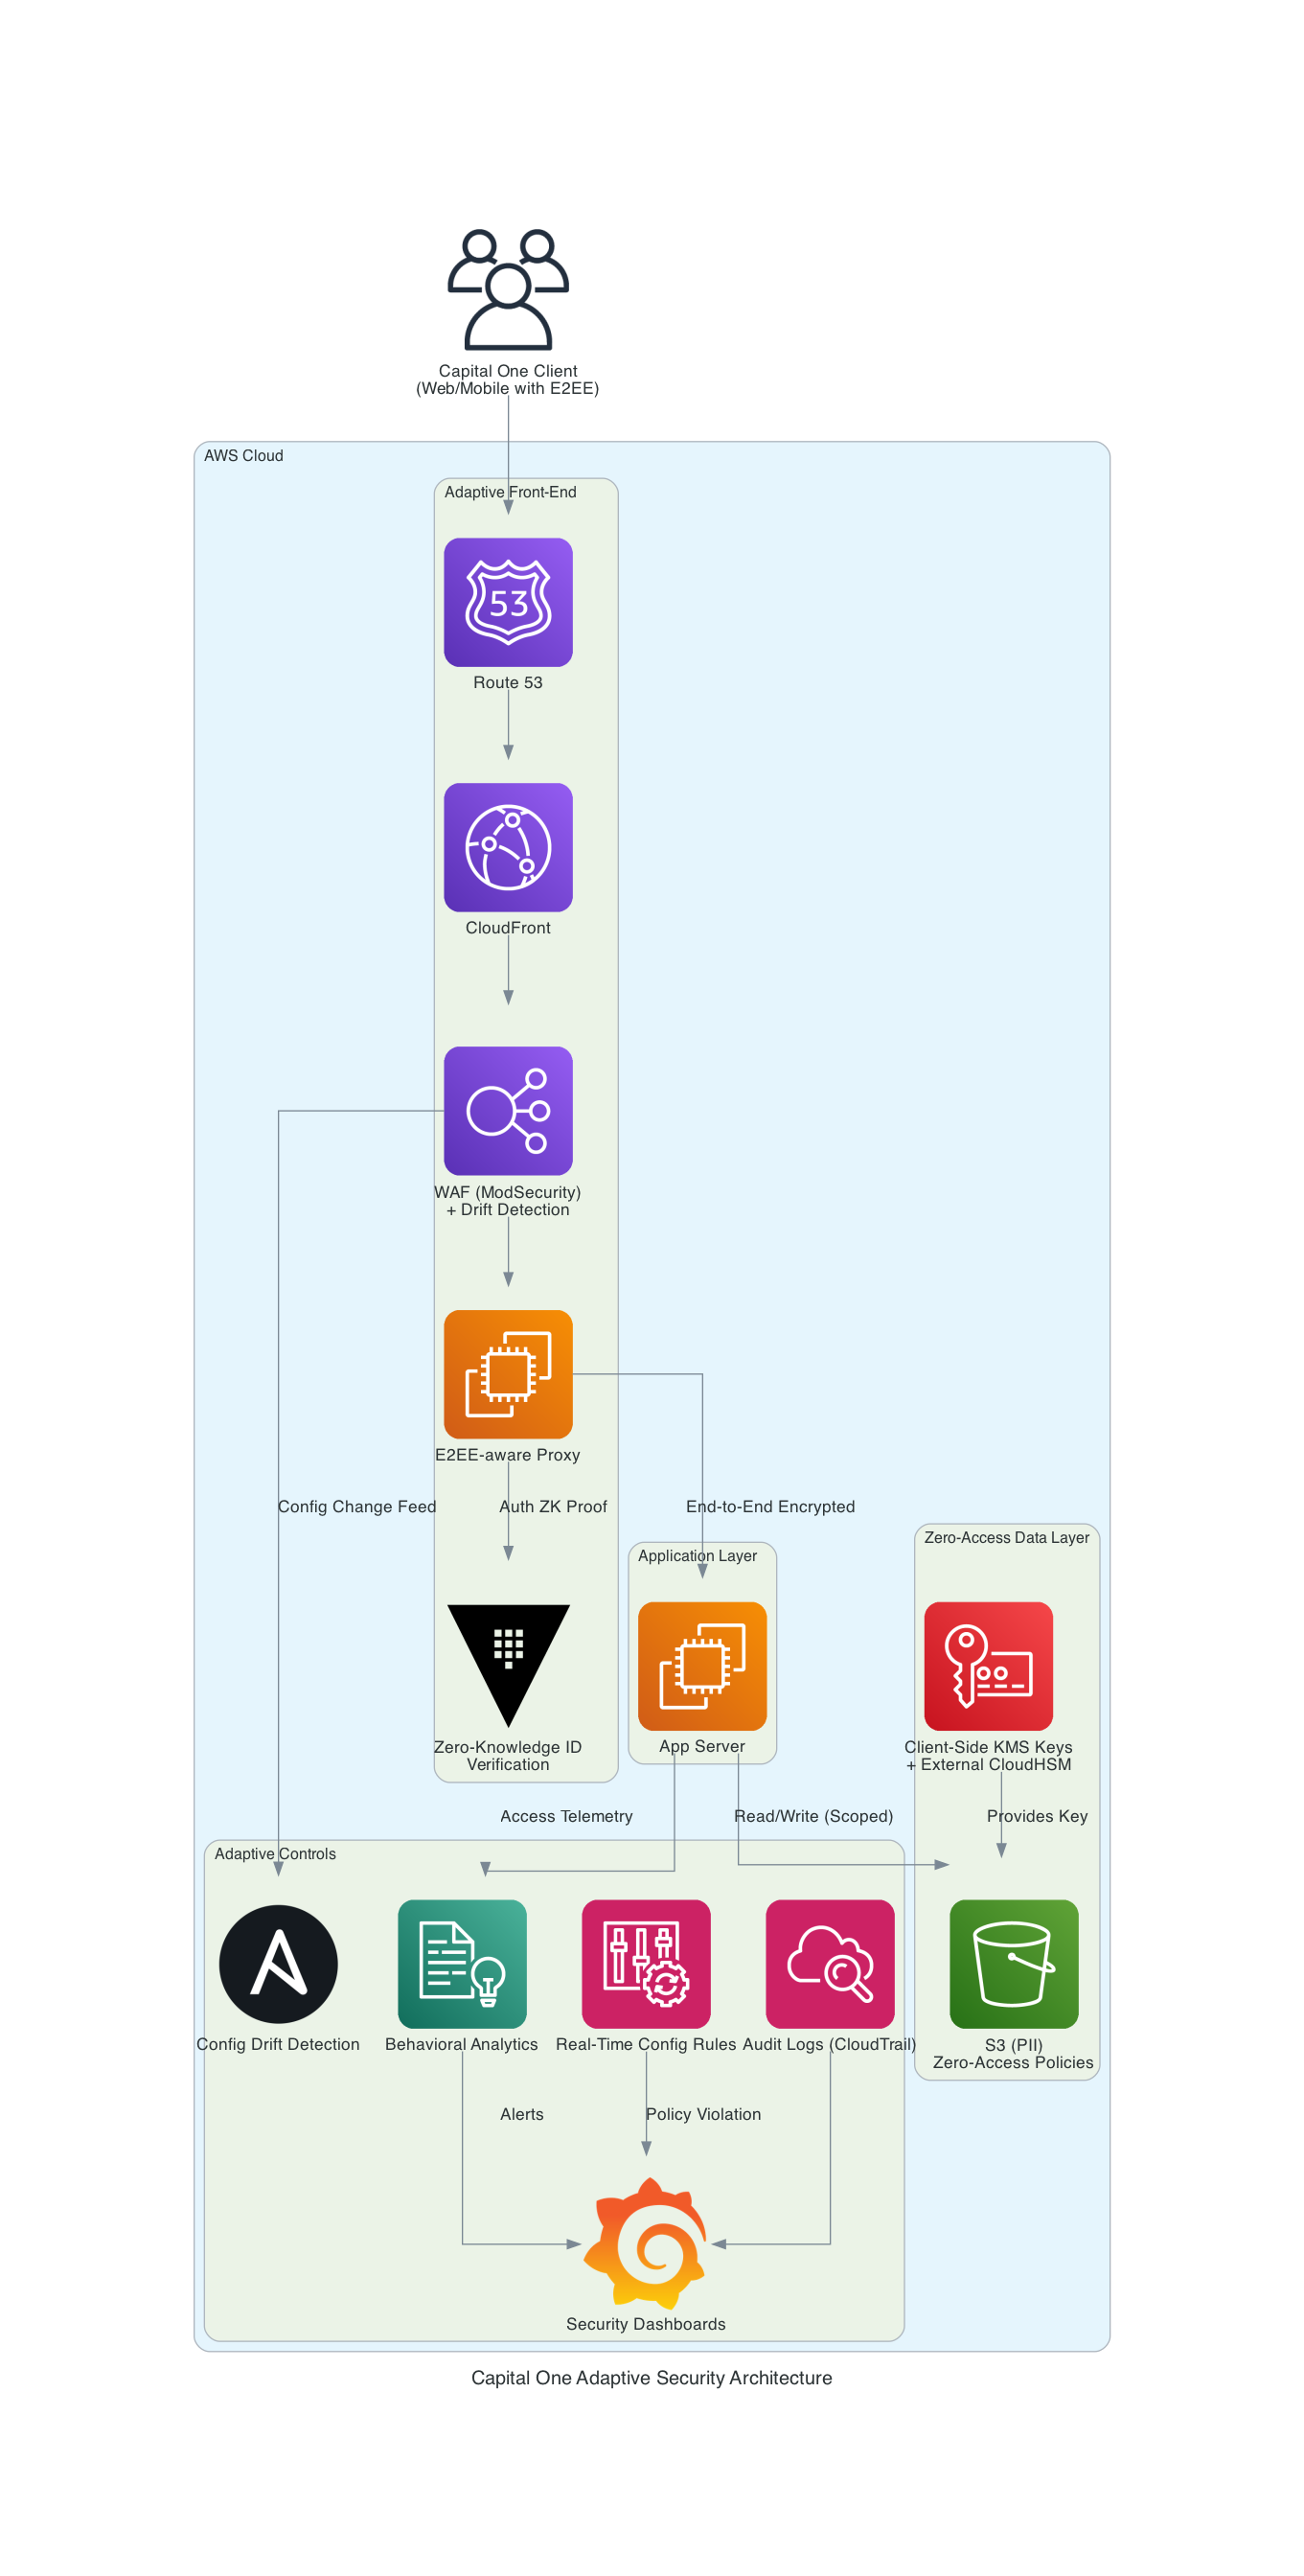

In [175]:
# Adaptive Security Controls for Capital One

# Control 1: Client-Side Encryption (CSE) with AWS KMS and S3 Private Buckets
# Applies to: S3 Buckets storing PII and credit applications
# Reason: Ensures Capital One controls encryption and decryption; cloud provider never sees plaintext; mitigates IAM credential abuse

# Control 2: Zero-Access Storage Policies (No Admin Access to S3)
# Applies to: Backend access to S3 buckets
# Reason: Enforces storage-level deny policies for AWS admins and internal systems, preventing lateral or unauthorized internal access

# Control 3: External Key Ownership via CloudHSM or Customer-Managed KMS
# Applies to: All encryption keys used in S3, EBS, and database services
# Reason: Keeps cryptographic key lifecycle entirely under Capital One’s control, reducing risk of compromise via compromised IAM roles

# Control 4: End-to-End Encryption (E2EE) for Web and Mobile Apps
# Applies to: Data exchanged between client applications and APIs
# Reason: Guarantees that only clients encrypt/decrypt sensitive data, shielding it even from application servers

# Control 5: Zero-Knowledge Proofs for Identity Verification
# Applies to: Authentication processes involving sensitive user identifiers
# Reason: Enables authentication without revealing PII, reducing data exposure and improving compliance with privacy requirements

# Control 6: Dynamic Monitoring and Behavior Analytics
# Applies to: Metadata Service (IMDS), IAM behavior, and data access
# Reason: Detects unusual credential requests or access patterns (e.g., SSRF to IMDSv1, TOR-based access), allowing rapid incident response


# Adaptive Security Architecture Diagram for Capital One

# Create output directory
if not os.path.exists("cyberarch"):
    os.makedirs("cyberarch")

# Define the ASA architecture diagram
with Diagram("Capital One Adaptive Security Architecture", show=False, direction="TB", outformat="png", filename="cyberarch/capitalone_asa"):

    # External client
    user = Users("Capital One Client\n(Web/Mobile with E2EE)")

    # Cloud boundary
    with Cluster("AWS Cloud"):

        # Identity and Front-End Controls
        with Cluster("Adaptive Front-End"):
            dns = Route53("Route 53")
            cdn = CloudFront("CloudFront")
            waf = ELB("WAF (ModSecurity)\n+ Drift Detection")
            proxy = EC2("E2EE-aware Proxy")
            vault = Vault("Zero-Knowledge ID\nVerification")

            user >> dns >> cdn >> waf >> proxy
            proxy >> Edge(label="Auth ZK Proof") >> vault

        # Application Layer
        with Cluster("Application Layer"):
            app_server = EC2("App Server")
            proxy >> Edge(label="End-to-End Encrypted") >> app_server

        # Security & Adaptive Controls
        with Cluster("Adaptive Controls"):
            behavior = Comprehend("Behavioral Analytics")
            drift = Ansible("Config Drift Detection")
            audit = Cloudwatch("Audit Logs (CloudTrail)")
            config = Config("Real-Time Config Rules")
            dashboard = Grafana("Security Dashboards")

            app_server >> Edge(label="Access Telemetry") >> behavior
            waf >> Edge(label="Config Change Feed") >> drift
            behavior >> Edge(label="Alerts") >> dashboard
            config >> Edge(label="Policy Violation") >> dashboard
            audit >> dashboard

        # Data & Encryption Layer
        with Cluster("Zero-Access Data Layer"):
            s3 = S3("S3 (PII)\nZero-Access Policies")
            kms = KMS("Client-Side KMS Keys\n+ External CloudHSM")

            kms >> Edge(label="Provides Key") >> s3
            app_server >> Edge(label="Read/Write (Scoped)") >> s3

# If running in Jupyter:
from IPython.display import Image
display(Image(filename="cyberarch/capitalone_asa.png"))




### Adaptive Security Controls Table

| **Control**                                       | **Where It Applies**                              | **Reason (Rationale)**                                                                                  |
|--------------------------------------------------|--------------------------------------------------|----------------------------------------------------------------------------------------------------------|
| Client-Side Encryption (CSE)                     | S3 Buckets storing PII and credit applications    | Ensures Capital One controls encryption and decryption; cloud provider never sees plaintext              |
| Zero-Access Storage Policies                     | Backend access to S3 buckets                      | Prevents internal and AWS admin access through deny policies; limits lateral movement or insider risk   |
| External Key Ownership via CloudHSM/KMS          | Encryption keys for S3, EBS, RDS                  | Keeps key lifecycle under Capital One’s control; avoids abuse via compromised IAM credentials            |
| End-to-End Encryption (E2EE)                     | Client-to-API communication                       | Ensures only clients encrypt/decrypt sensitive data, shielding it from application infrastructure        |
| Zero-Knowledge Proofs (ZKP)                      | Authentication layer                              | Enables secure identity verification without exposing PII; reduces data exposure                         |
| Dynamic Monitoring and Behavior Analytics        | IMDS, IAM activity, data access                   | Detects anomalies (e.g., SSRF, TOR access); enables early detection and rapid incident response          |


# Conclusion


### Question 13: Summarize Your Findings
Summarize the effectiveness of each architecture (DiD, Zero Trust, Adaptive Security) in mitigating the Equifax, SolarWinds, and Capital One breaches.


**Your Answer**: 

Defense-in-Depth (DiD)

Defense-in-Depth was particularly effective for mitigating the Equifax breach. It directly addressed core issues such as the lack of patch management, poor segmentation, and weak endpoint controls. In Capital One’s case, DiD would have reduced exposure through hardened WAF rules, stricter IAM permissions, and centralized monitoring. For SolarWinds, DiD controls like signed builds and endpoint protection would have improved defenses, but static layers alone may not have been sufficient against the advanced supply chain compromise.

Zero Trust Architecture (ZTA)

Zero Trust Architecture would have significantly limited the damage in all three cases. In Equifax, strict identity and access control and micro-segmentation would have blocked lateral movement and protected data stores. For Capital One, ZTA controls such as token-based access, metadata protection, and just-in-time permissions would have stopped or contained the SSRF attack and IAM misuse. In SolarWinds, ZTA would have prevented unauthorized access to the build pipeline and enforced continuous authentication and authorization in the update infrastructure.

Adaptive Security Architecture (ASA)

Adaptive Security Architecture adds dynamic response, behavior-based analysis, and automated controls. For Equifax, ASA would have enabled early detection through telemetry and blocked unpatched services via runtime controls. Capital One would have benefited from contextual IAM monitoring and telemetry-driven alerts on metadata and S3 access. In SolarWinds, ASA would have been most impactful, detecting anomalous build behavior, triggering alerts during unauthorized signing, and blocking lateral movement or C2 traffic through automated SOAR responses and deception technologies.

**Your Answer**: Defense-in-Depth (DiD)

Defense-in-Depth was particularly effective for mitigating the Equifax breach. It directly addressed core issues such as the lack of patch management, poor segmentation, and weak endpoint controls. In Capital One’s case, DiD would have reduced exposure through hardened WAF rules, stricter IAM permissions, and centralized monitoring. For SolarWinds, DiD controls like signed builds and endpoint protection would have improved defenses, but static layers alone may not have been sufficient against the advanced supply chain compromise.

Zero Trust Architecture (ZTA)

Zero Trust Architecture would have significantly limited the damage in all three cases. In Equifax, strict identity and access control and micro-segmentation would have blocked lateral movement and protected data stores. For Capital One, ZTA controls such as token-based access, metadata protection, and just-in-time permissions would have stopped or contained the SSRF attack and IAM misuse. In SolarWinds, ZTA would have prevented unauthorized access to the build pipeline and enforced continuous authentication and authorization in the update infrastructure.

Adaptive Security Architecture (ASA)

Adaptive Security Architecture adds dynamic response, behavior-based analysis, and automated controls. For Equifax, ASA would have enabled early detection through telemetry and blocked unpatched services via runtime controls. Capital One would have benefited from contextual IAM monitoring and telemetry-driven alerts on metadata and S3 access. In SolarWinds, ASA would have been most impactful, detecting anomalous build behavior, triggering alerts during unauthorized signing, and blocking lateral movement or C2 traffic through automated SOAR responses and deception technologies.